## US prezidento rinkimai eksploracija

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
# Prezidento rinkimų duomenų failo įkėlimas
file_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president.csv"
election_data = pd.read_csv(file_path)

In [4]:
# Peržiūrime pirmas 5 eilutes
print(election_data.head(5))

   year    state state_po  state_fips  state_cen  state_ic        office  \
0  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
1  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
2  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
3  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
4  1976  ALABAMA       AL           1         63        41  US PRESIDENT   

                 candidate              party_detailed writein  \
0            CARTER, JIMMY                    DEMOCRAT   False   
1             FORD, GERALD                  REPUBLICAN   False   
2           MADDOX, LESTER  AMERICAN INDEPENDENT PARTY   False   
3  BUBAR, BENJAMIN ""BEN""                 PROHIBITION   False   
4                HALL, GUS         COMMUNIST PARTY USE   False   

   candidatevotes  totalvotes   version  notes party_simplified    State  \
0          659170     1182850  20210113    NaN         DEMOCRAT  ALABA

In [5]:
# Patikriname duomenų tipus
print(election_data.dtypes)

year                  int64
state                object
state_po             object
state_fips            int64
state_cen             int64
state_ic              int64
office               object
candidate            object
party_detailed       object
writein              object
candidatevotes        int64
totalvotes            int64
version               int64
notes               float64
party_simplified     object
State                object
electoral_votes       int64
dtype: object


In [ ]:
# Aprašomoji statistika
print(election_data.describe(include="all"))

               year     state state_po   state_fips    state_cen     state_ic  \
count   4287.000000      4287     4287  4287.000000  4287.000000  4287.000000   
unique          NaN        51       51          NaN          NaN          NaN   
top             NaN  COLORADO       CO          NaN          NaN          NaN   
freq            NaN       149      149          NaN          NaN          NaN   
mean    1999.080942       NaN      NaN    28.616982    53.665034    39.754840   
std       14.220014       NaN      NaN    15.616459    26.029189    22.772216   
min     1976.000000       NaN      NaN     1.000000    11.000000     1.000000   
25%     1988.000000       NaN      NaN    16.000000    33.000000    22.000000   
50%     2000.000000       NaN      NaN    28.000000    53.000000    42.000000   
75%     2012.000000       NaN      NaN    41.000000    81.000000    61.000000   
max     2020.000000       NaN      NaN    56.000000    95.000000    82.000000   

              office     ca

In [7]:
# Patikriname, ar yra trūkstamų reikšmių
print(election_data.isnull().sum())

year                   0
state                  0
state_po               0
state_fips             0
state_cen              0
state_ic               0
office                 0
candidate            287
party_detailed       456
writein                3
candidatevotes         0
totalvotes             0
version                0
notes               4287
party_simplified       0
State                  0
electoral_votes        0
dtype: int64


In [ ]:
# Patikriname, kiek yra unikalių reikšmių kiekviename stulpelyje
print(election_data.nunique())

year                  12
state                 51
state_po              51
state_fips            51
state_cen             51
state_ic              51
office                 1
candidate            270
party_detailed       172
writein                2
candidatevotes      3755
totalvotes           612
version                1
notes                  0
party_simplified       4
State                 51
electoral_votes       40
dtype: int64


In [ ]:
# Pasirenkame tik skaitmeninius stulpelius koreliacijos matricai
numeric_data = election_data.select_dtypes(include=["int64", "float64"])
print(numeric_data.corr())

                     year  state_fips  state_cen  state_ic  candidatevotes  \
year             1.000000   -0.041868   0.021778  0.016484        0.046903   
state_fips      -0.041868    1.000000  -0.180363 -0.096493       -0.017736   
state_cen        0.021778   -0.180363   1.000000  0.958535       -0.010341   
state_ic         0.016484   -0.096493   0.958535  1.000000       -0.016980   
candidatevotes   0.046903   -0.017736  -0.010341 -0.016980        1.000000   
totalvotes       0.200846   -0.074419  -0.070217 -0.082694        0.375120   
version               NaN         NaN        NaN       NaN             NaN   
notes                 NaN         NaN        NaN       NaN             NaN   
electoral_votes -0.000789   -0.058910  -0.068287 -0.082185        0.376241   

                 totalvotes  version  notes  electoral_votes  
year               0.200846      NaN    NaN        -0.000789  
state_fips        -0.074419      NaN    NaN        -0.058910  
state_cen         -0.070217   

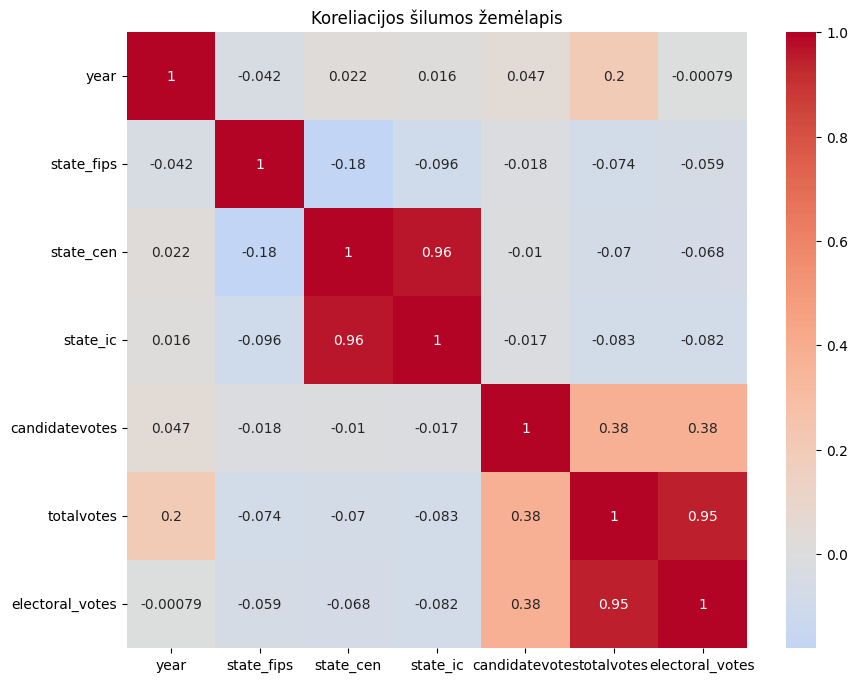

In [ ]:
# Nurodykite failo kelią su rinkimų duomenimis
rinkimu_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# Nuskaitome duomenis
rinkimu_duomenys = pd.read_csv(rinkimu_failo_kelias)

# Filtruojame tik skaitmeninius stulpelius, išskyrus "notes" ir "version"
numeric_data_filtered = rinkimu_duomenys.select_dtypes(include=["int64", "float64"]).drop(columns=["version", "notes"], errors="ignore")

# Braižome koreliacijos šilumos žemėlapį
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data_filtered.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Koreliacijos šilumos žemėlapis")
plt.show()

In [ ]:
# Laimėjusios partijos analizė pagal metus ir valstijas
dominant_party = election_data.loc[election_data.groupby(["year", "state"])["candidatevotes"].idxmax()]
print(dominant_party[["year", "state", "party_simplified"]].value_counts())

year  state                 party_simplified
2020  WYOMING               REPUBLICAN          1
1976  ALABAMA               DEMOCRAT            1
      ALASKA                REPUBLICAN          1
      ARIZONA               REPUBLICAN          1
2020  NORTH DAKOTA          REPUBLICAN          1
                                               ..
1976  DISTRICT OF COLUMBIA  DEMOCRAT            1
      DELAWARE              DEMOCRAT            1
      CONNECTICUT           REPUBLICAN          1
      COLORADO              REPUBLICAN          1
      CALIFORNIA            REPUBLICAN          1
Name: count, Length: 612, dtype: int64


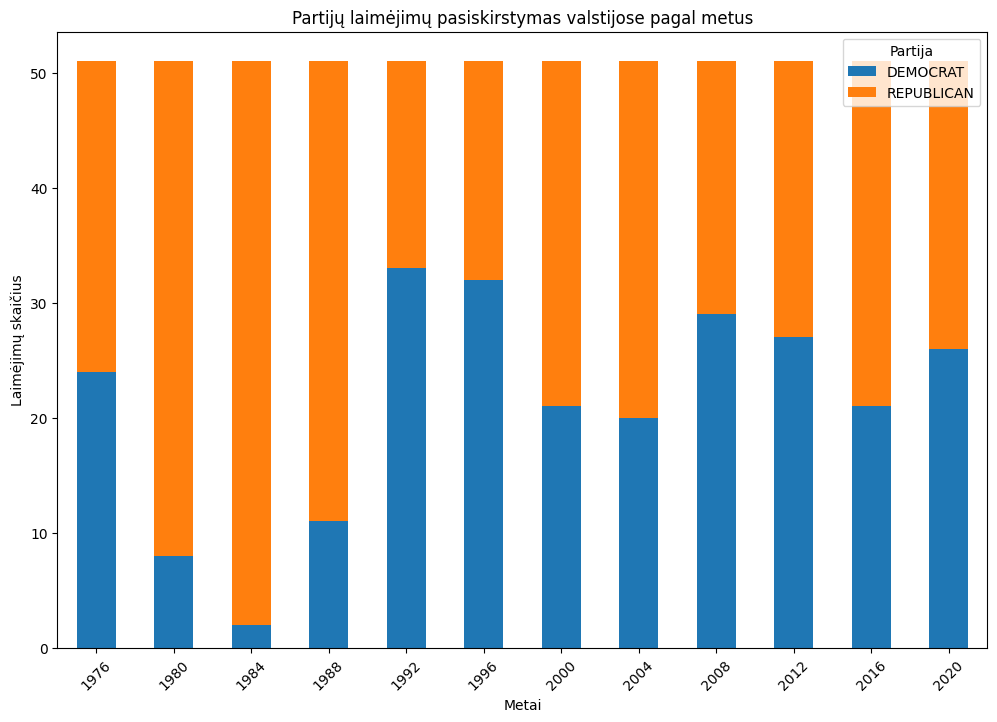

In [ ]:
# Suskaičiuojame, kiek kartų kiekviena partija laimėjo per metus pagal valstijas
dominant_count = dominant_party.groupby(["year", "party_simplified"]).size().unstack()

# Sukuriame stulpelinę diagramą
dominant_count.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title("Partijų laimėjimų pasiskirstymas valstijose pagal metus")
plt.xlabel("Metai")
plt.ylabel("Laimėjimų skaičius")
plt.legend(title="Partija")
plt.xticks(rotation=45)
plt.show()


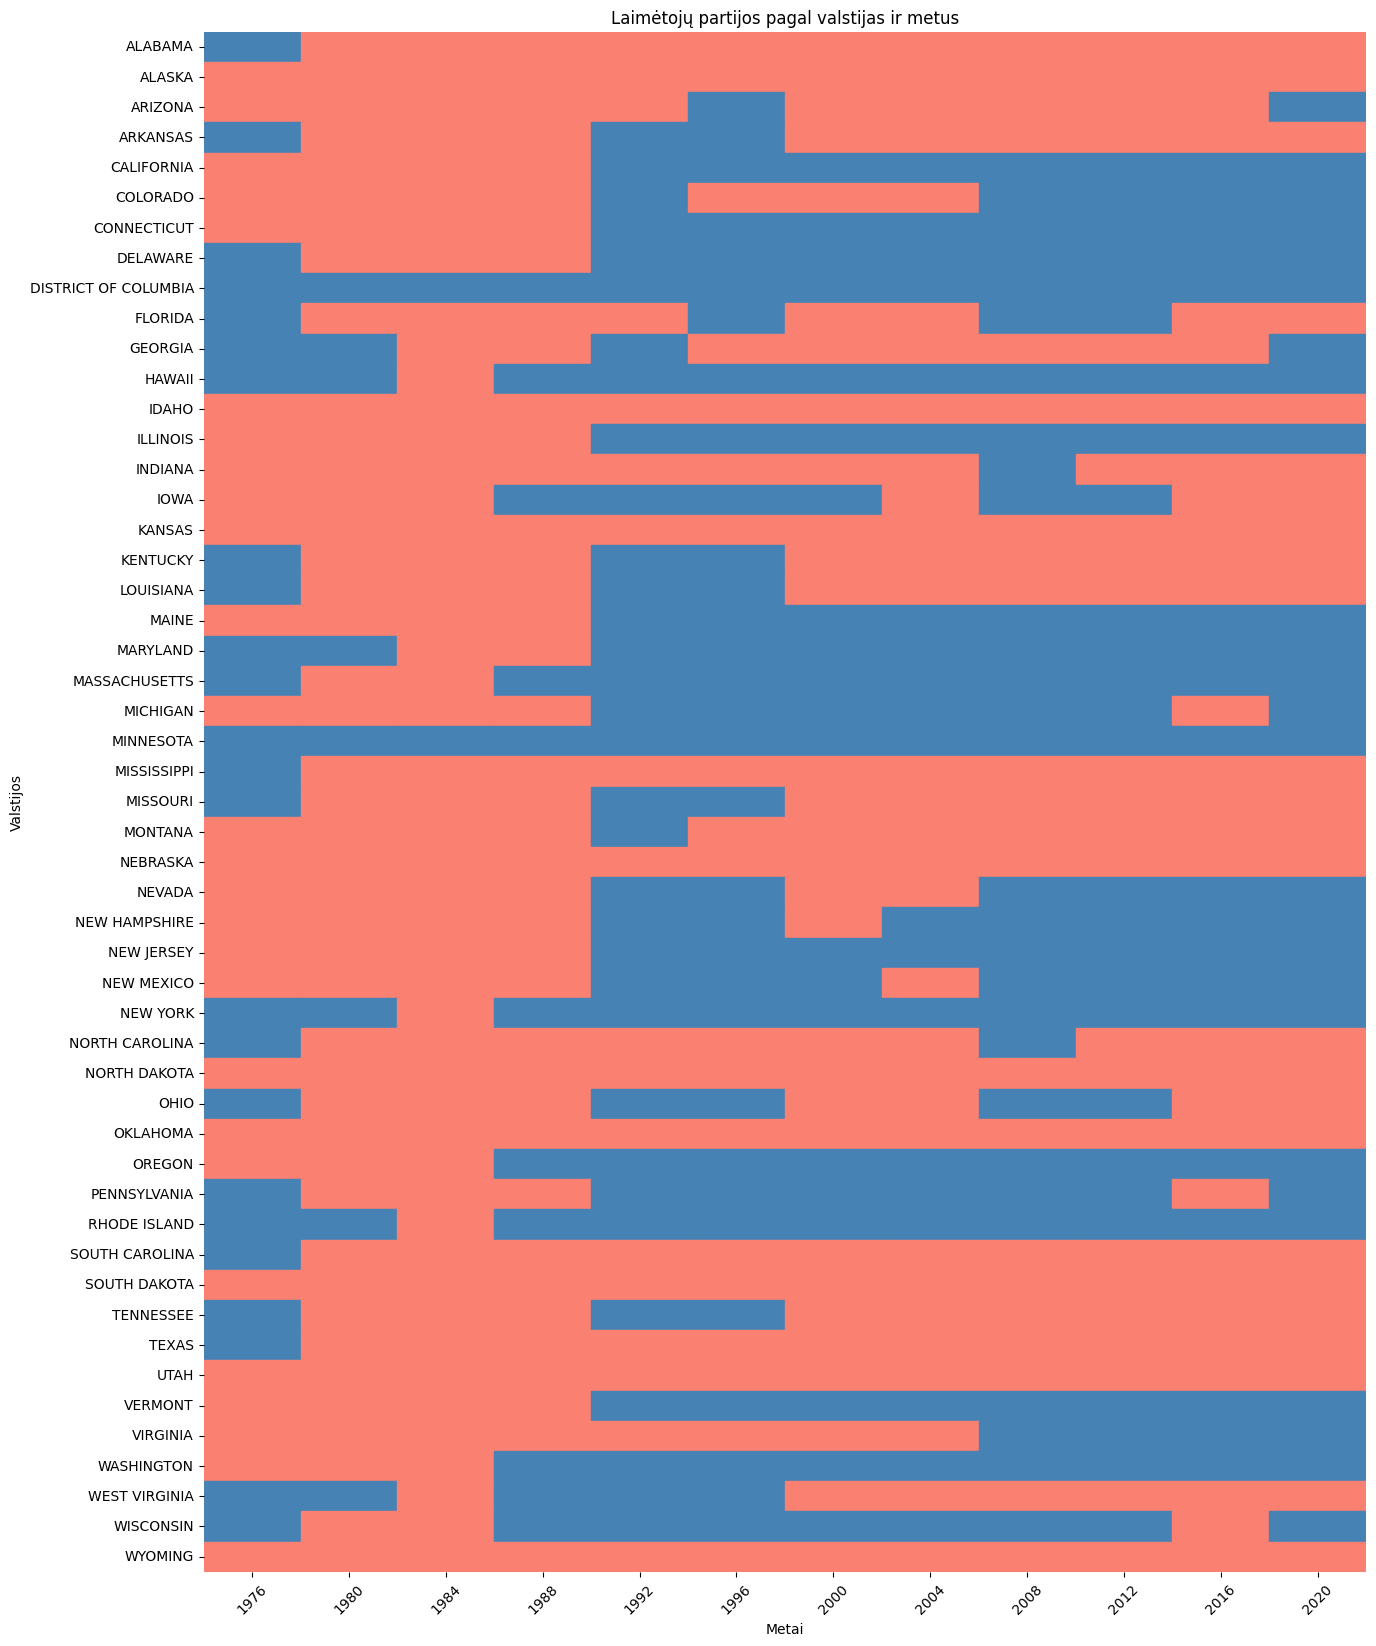

In [ ]:
# Sukuriame lentelę su laimėtojų partijomis pagal metus ir valstijas
heatmap_data = dominant_party.pivot_table(index="state", columns="year", values="party_simplified", aggfunc=lambda x: x.mode()[0])

# Priskiriame šviesiai mėlynas ir šviesiai raudonas spalvas partijoms
party_colors = {
    "DEMOCRAT": "steelblue",
    "REPUBLICAN": "salmon",
    "OTHER": "gray"
}

# Sukuriame spalvų žemėlapį iš esamų partijų spalvų (nurodome spalvas pagal partijas)
heatmap_colors = heatmap_data.apply(lambda row: row.map(lambda x: party_colors.get(x, "white")), axis=1)

# Konvertuojame spalvų žemėlapį į RGB reikšmes (matplotlib priima tokį formatą)
rgb_heatmap = heatmap_colors.apply(lambda row: row.map(lambda x: mcolors.to_rgb(x)), axis=1)

# Sukuriame paveikslą
fig, ax = plt.subplots(figsize=(15, 20))

# Sukuriame šilumos žemėlapį naudodami `sns.heatmap`, rodant RGB spalvas tiesiogiai
sns.heatmap(heatmap_data.isnull() * 0, cmap=mcolors.ListedColormap(["white"]), cbar=False, linewidths=0.5, linecolor="lightgray", ax=ax)

# Pakeičiame kiekvieną langelį su norima RGB spalva
for y in range(rgb_heatmap.shape[0]):
    for x in range(rgb_heatmap.shape[1]):
        color = rgb_heatmap.iloc[y, x]
        ax.add_patch(plt.Rectangle((x, y), 1, 1, color=color))

# Sukuriame pavadinimus ir žymas
plt.title("Laimėtojų partijos pagal valstijas ir metus")
plt.xlabel("Metai")
plt.ylabel("Valstijos")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

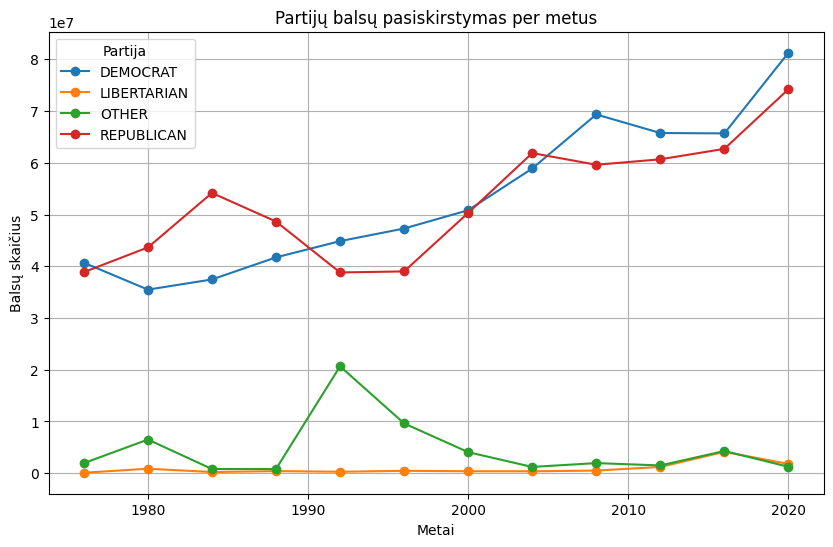

In [ ]:
# Grupavimas pagal metus ir partijas
party_trends = election_data.groupby(["year", "party_simplified"])["candidatevotes"].sum().unstack()

# Sukuriame linijinę diagramą
party_trends.plot(kind="line", figsize=(10, 6), marker="o")
plt.title("Partijų balsų pasiskirstymas per metus")
plt.xlabel("Metai")
plt.ylabel("Balsų skaičius")
plt.legend(title="Partija")
plt.grid(True)
plt.show()


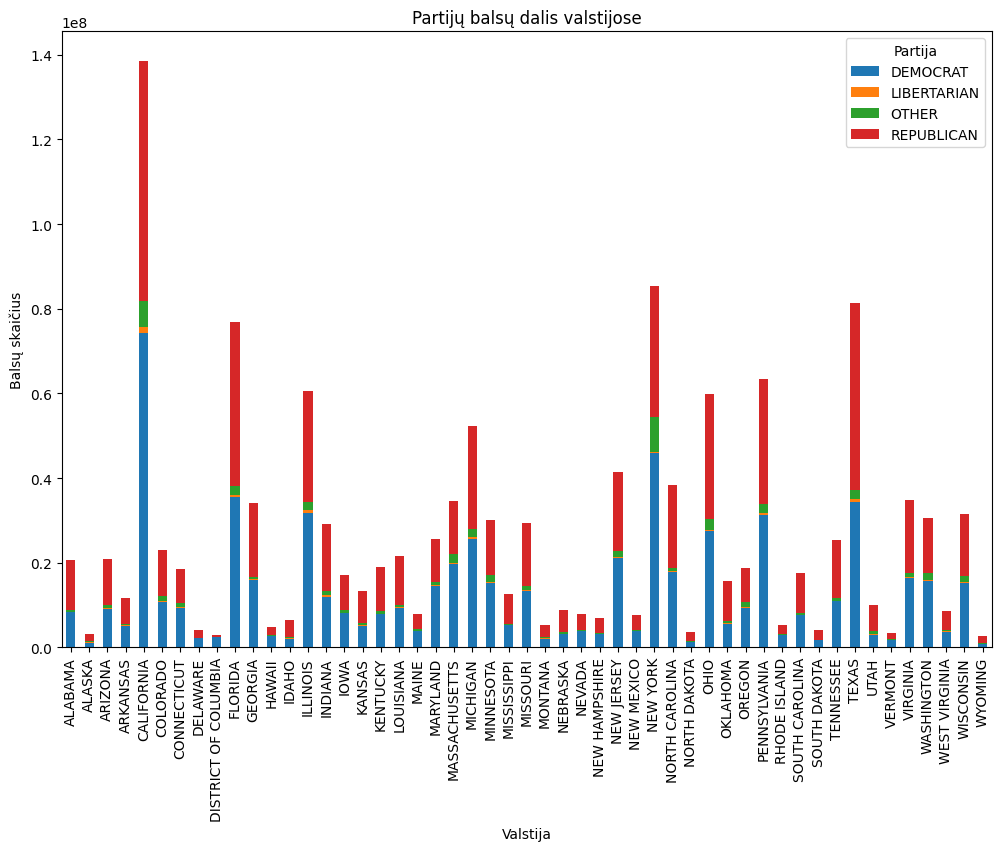

In [ ]:
# Grupavimas pagal valstijas ir partijas
state_party_votes = election_data.groupby(["state", "party_simplified"])["candidatevotes"].sum().unstack()

# Sukuriame stulpelinę diagramą
state_party_votes.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title("Partijų balsų dalis valstijose")
plt.xlabel("Valstija")
plt.ylabel("Balsų skaičius")
plt.legend(title="Partija")
plt.xticks(rotation=90)
plt.show()


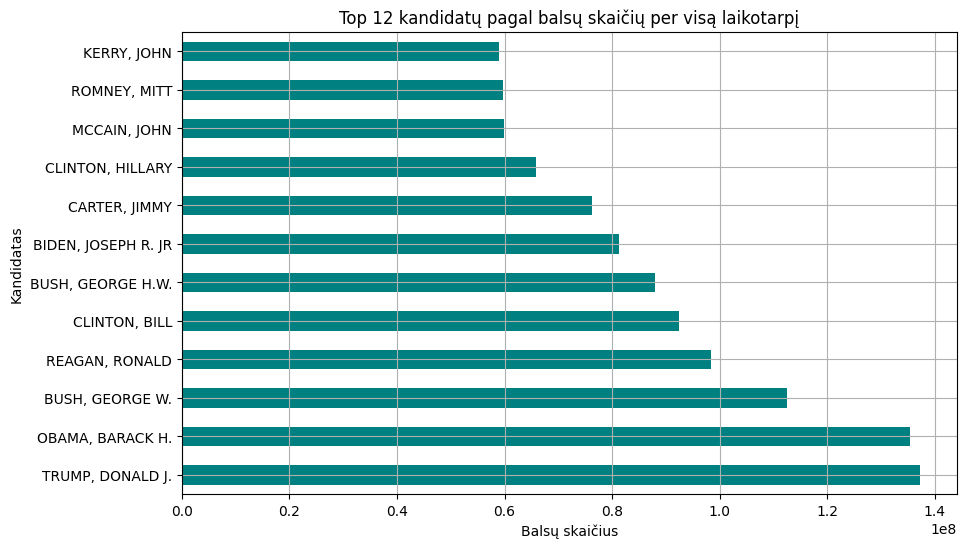

In [ ]:
# Grupavimas pagal kandidatus ir sumavimas balsų
top_candidates = election_data.groupby("candidate")["candidatevotes"].sum().nlargest(12)

# Sukuriame horizontalią stulpelinę diagramą
top_candidates.plot(kind="barh", color="teal", figsize=(10, 6))
plt.title("Top 12 kandidatų pagal balsų skaičių per visą laikotarpį")
plt.xlabel("Balsų skaičius")
plt.ylabel("Kandidatas")
plt.grid(True)
plt.show()


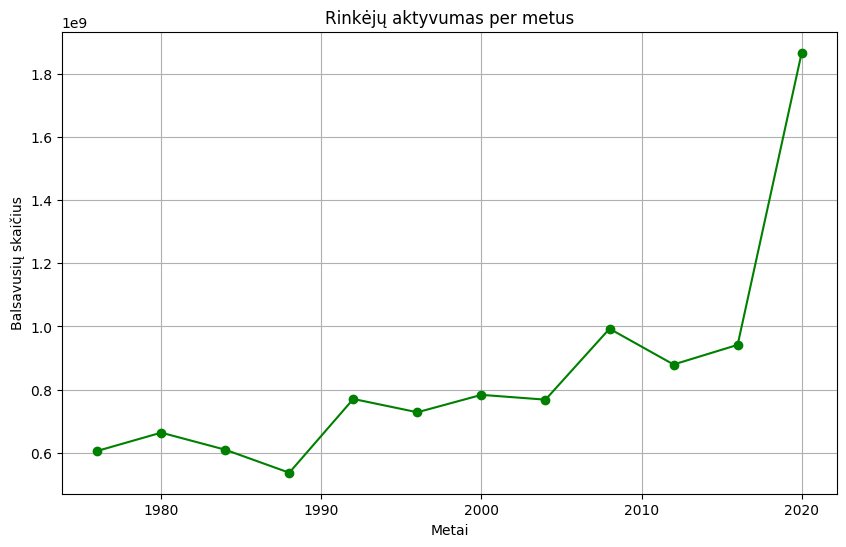

In [ ]:
# Grupavimas pagal metus ir sumavimas visų balsų
voter_turnout = election_data.groupby("year")["totalvotes"].sum()

# Sukuriame linijinę diagramą
voter_turnout.plot(kind="line", marker="o", color="green", figsize=(10, 6))
plt.title("Rinkėjų aktyvumas per metus")
plt.xlabel("Metai")
plt.ylabel("Balsavusių skaičius")
plt.grid(True)
plt.show()


Neteisingai nubraizytas grafikas, pazymi daugiausia gavusius bendrai balsų tačiau jie nevisada yra rinkimų laimėtojai

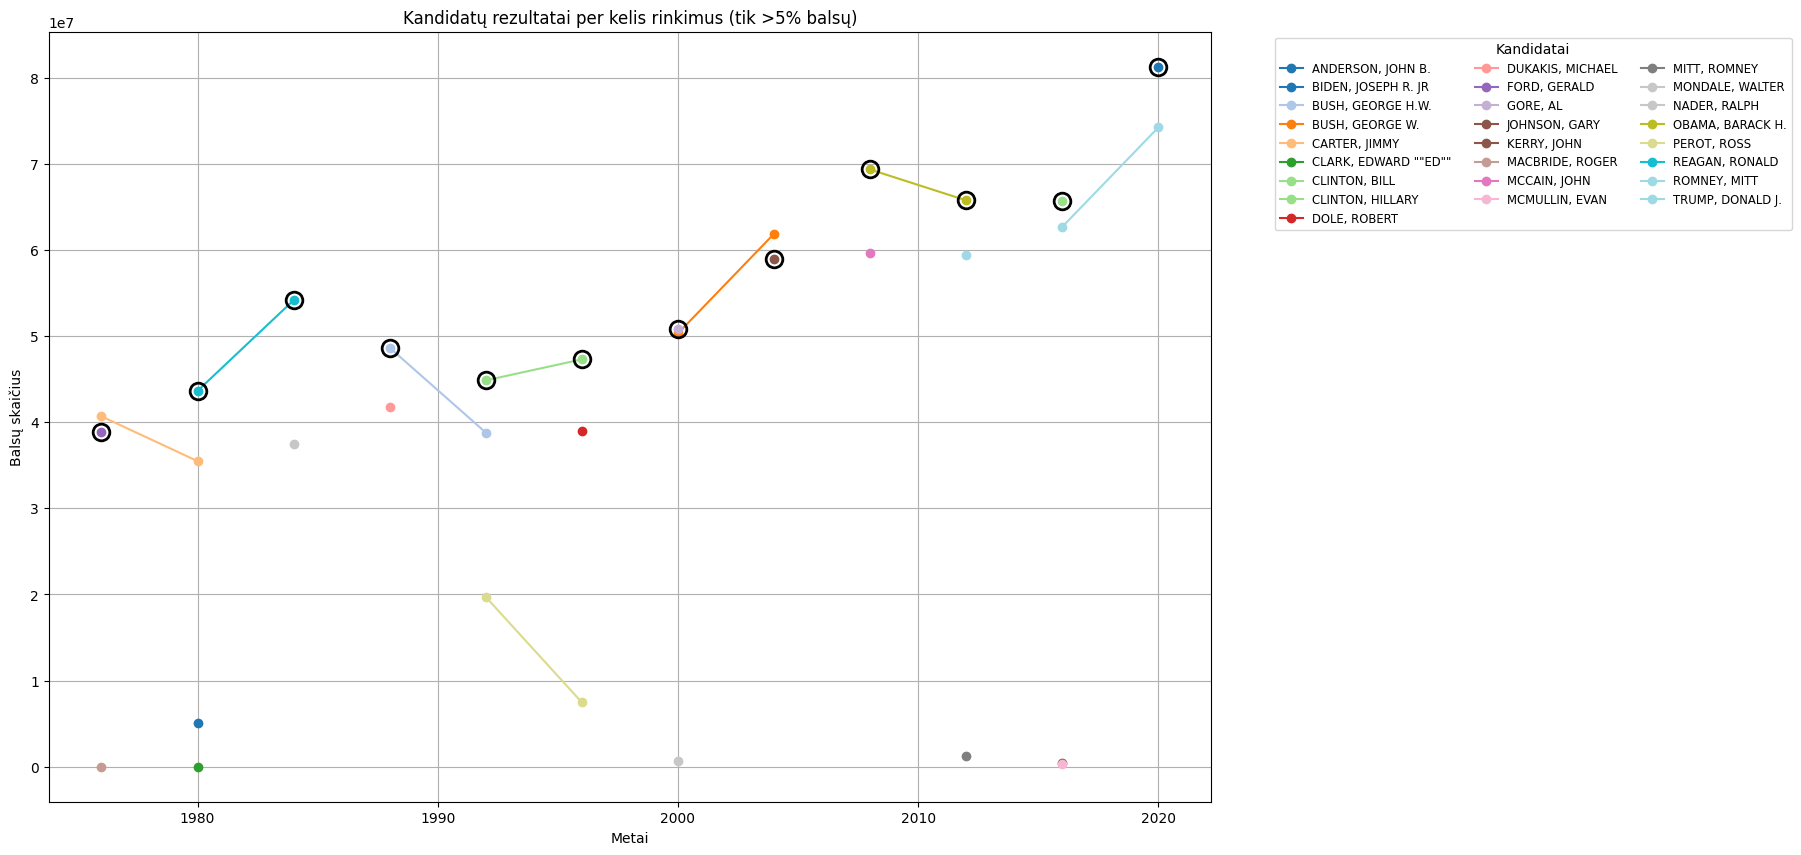

In [ ]:
import matplotlib.pyplot as plt

# Filtruojame duomenis tik pagal prezidento rinkimų kandidatus
presidential_candidates = election_data[election_data["office"] == "US PRESIDENT"]

# Skaičiuojame procentą balsų, kuriuos surinko kiekvienas kandidatas tais metais
presidential_candidates["vote_percentage"] = (presidential_candidates["candidatevotes"] / presidential_candidates["totalvotes"]) * 100

# Filtruojame tik tuos kandidatus, kurie surinko daugiau nei 5% balsų
presidential_candidates = presidential_candidates[presidential_candidates["vote_percentage"] >= 5]

# Nustatome laimėtojus kiekvienais metais
winners = presidential_candidates.loc[presidential_candidates.groupby("year")["candidatevotes"].idxmax()]

# Grupavimas pagal metus ir kandidatus
candidate_trends = presidential_candidates.groupby(["year", "candidate"])["candidatevotes"].sum().unstack()

# Pašaliname 0 reikšmes (kandidatai, kurie tais metais nedalyvavo, nebus rodomi)
candidate_trends = candidate_trends.replace(0, pd.NA).dropna(axis=1, how="all")

# Filtruojame tik tuos kandidatus, kurie bent vienuose rinkimuose viršijo 5% ribą
valid_candidates = candidate_trends.columns[candidate_trends.notna().any()]

# Pasirenkame spalvas ir simbolius kiekvienam kandidatui automatiškai
colors = plt.get_cmap("tab20", len(valid_candidates))
fig, ax = plt.subplots(figsize=(15, 10))

# Nubraižome kiekvieno kandidato liniją tik tada, jei jis yra valid_candidates sąraše
for idx, candidate in enumerate(valid_candidates):
    ax.plot(candidate_trends.index, candidate_trends[candidate], label=candidate, marker="o", color=colors(idx))

# Apibraukiame taškus, kurie buvo laimėtojai (remdamiesi tik `winners` duomenimis)
for idx, row in winners.iterrows():
    year = row["year"]
    candidate = row["candidate"]
    if candidate in valid_candidates:
        ax.plot(year, candidate_trends.loc[year, candidate], marker="o", markersize=12,
                markerfacecolor="none", markeredgewidth=2, markeredgecolor="black")

plt.title("Kandidatų rezultatai per kelis rinkimus (tik >5% balsų)")
plt.xlabel("Metai")
plt.ylabel("Balsų skaičius")

# Sumažiname šrifto dydį ir išdėstome legendą keliais stulpeliais
plt.legend(title="Kandidatai", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small", ncol=3)
plt.grid(True)
plt.show()


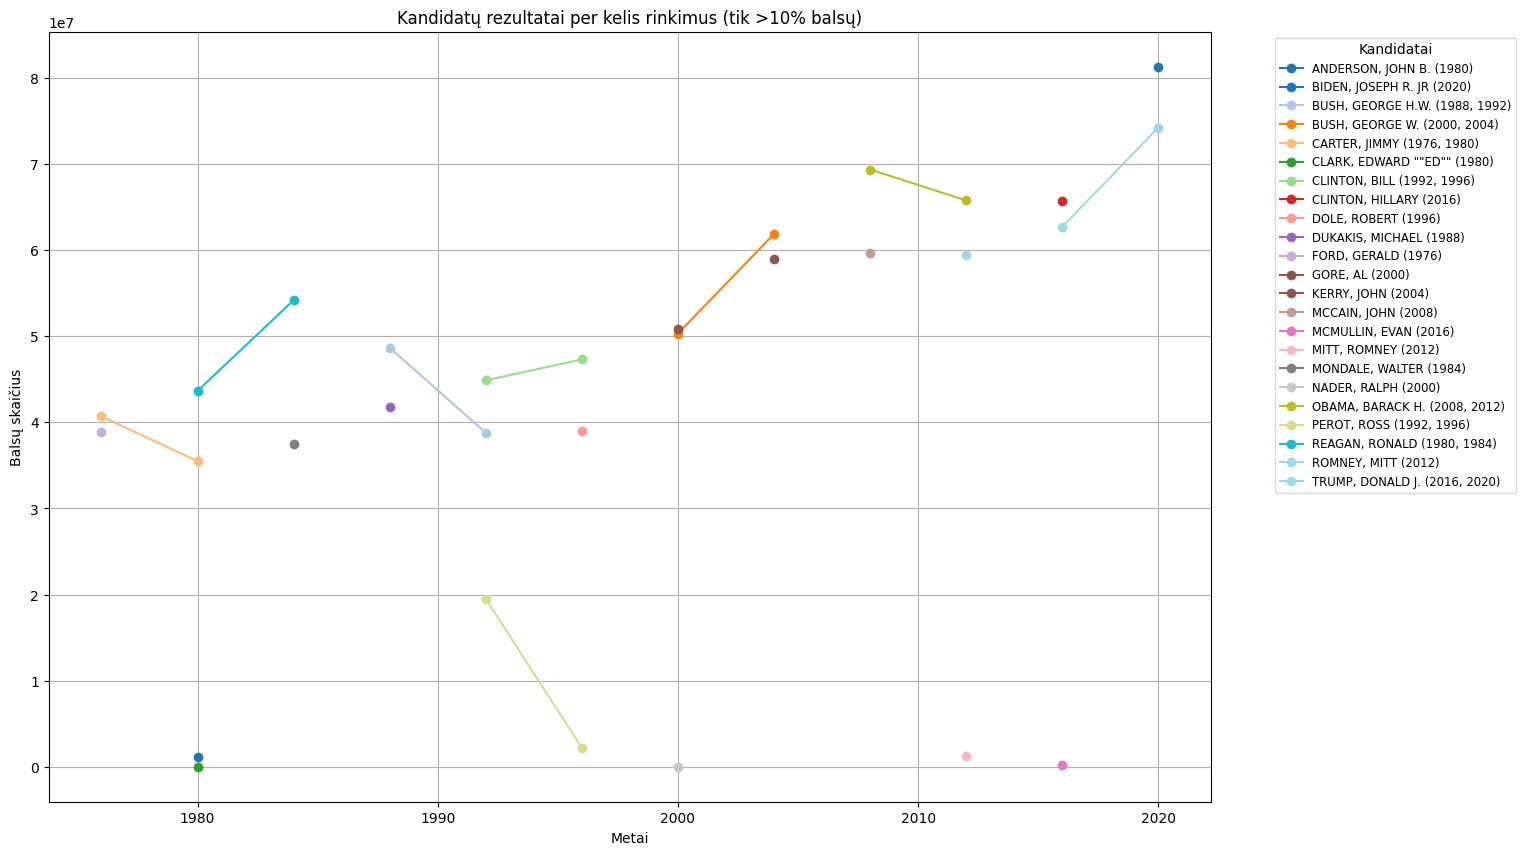

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Nurodykite kelią į failą, kuriame yra nacionaliniai laimėtojai
winners_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\president_national_winners.csv"

# Nuskaitome laimėtojų failą
national_winners = pd.read_csv(winners_failo_kelias)

# Filtruojame duomenis tik pagal prezidento rinkimų kandidatus
presidential_candidates = election_data[election_data["office"] == "US PRESIDENT"]

# Skaičiuojame procentą balsų, kuriuos surinko kiekvienas kandidatas tais metais
presidential_candidates["vote_percentage"] = (presidential_candidates["candidatevotes"] / presidential_candidates["totalvotes"]) * 100

# Filtruojame tik tuos kandidatus, kurie surinko daugiau nei 10% balsų
presidential_candidates = presidential_candidates[presidential_candidates["vote_percentage"] >= 10]

# Grupavimas pagal metus ir kandidatus
candidate_trends = presidential_candidates.groupby(["year", "candidate"])["candidatevotes"].sum().unstack()

# Pašaliname 0 reikšmes (kandidatai, kurie tais metais nedalyvavo, nebus rodomi)
candidate_trends = candidate_trends.replace(0, pd.NA).dropna(axis=1, how="all")

# Filtruojame tik tuos kandidatus, kurie bent vienuose rinkimuose viršijo 10% ribą
valid_candidates = candidate_trends.columns[candidate_trends.notna().any()]

# Pasirenkame spalvas ir simbolius kiekvienam kandidatui automatiškai
colors = plt.get_cmap("tab20", len(valid_candidates))
fig, ax = plt.subplots(figsize=(15, 10))

# Nubraižome kiekvieno kandidato liniją tik tada, jei jis yra valid_candidates sąraše
for idx, candidate in enumerate(valid_candidates):
    ax.plot(candidate_trends.index, candidate_trends[candidate], label=candidate, marker="o", color=colors(idx))

# Sukuriame sąrašą su laimėtojais, kad galėtume atskirti juos legendoje
winners_set = set(national_winners["candidate"])

# Sukuriame modifikuotą legendą, kurioje laimėtojai išskiriami
legend_labels = []
for candidate in valid_candidates:
    if candidate in winners_set:
        # Laimėtojai bus paryškinti arba pabraukti
        label = f"**{candidate}**"
    else:
        label = candidate
    legend_labels.append(label)

# Papildome kandidatų vardus su jų metais
legend_with_years = [f"{candidate} ({", ".join(map(str, candidate_trends[candidate].dropna().index))})" for candidate in valid_candidates]

# Pridėkime visą modifikuotą legendą į diagramą
plt.title("Kandidatų rezultatai per kelis rinkimus (tik >10% balsų)")
plt.xlabel("Metai")
plt.ylabel("Balsų skaičius")

# Pradinė legenda su kandidatais (modifikuoti pavadinimai)
legend = ax.legend(legend_with_years, title="Kandidatai", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small", ncol=1)

plt.grid(True)
plt.show()


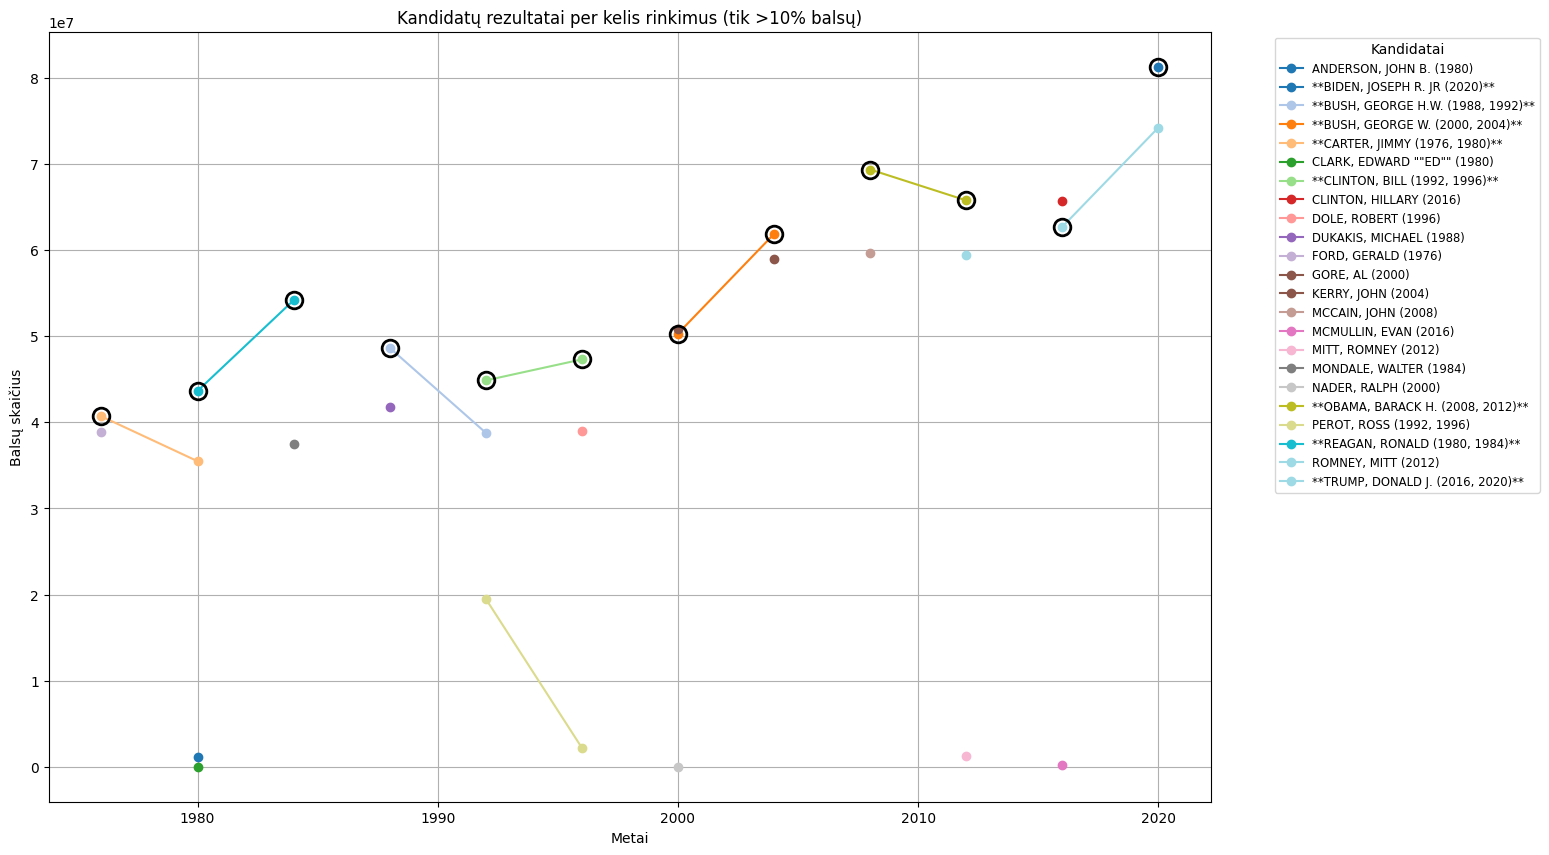

In [ ]:
# Nurodykite kelią į failą, kuriame yra nacionaliniai laimėtojai
winners_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\president_national_winners.csv"

# Nuskaitome laimėtojų failą
national_winners = pd.read_csv(winners_failo_kelias)

# Filtruojame duomenis tik pagal prezidento rinkimų kandidatus
presidential_candidates = election_data[election_data["office"] == "US PRESIDENT"]

# Skaičiuojame procentą balsų, kuriuos surinko kiekvienas kandidatas tais metais
presidential_candidates["vote_percentage"] = (presidential_candidates["candidatevotes"] / presidential_candidates["totalvotes"]) * 100

# Filtruojame tik tuos kandidatus, kurie surinko daugiau nei 10% balsų
presidential_candidates = presidential_candidates[presidential_candidates["vote_percentage"] >= 10]

# Grupavimas pagal metus ir kandidatus
candidate_trends = presidential_candidates.groupby(["year", "candidate"])["candidatevotes"].sum().unstack()

# Pašaliname 0 reikšmes (kandidatai, kurie tais metais nedalyvavo, nebus rodomi)
candidate_trends = candidate_trends.replace(0, pd.NA).dropna(axis=1, how="all")

# Filtruojame tik tuos kandidatus, kurie bent vienuose rinkimuose viršijo 10% ribą
valid_candidates = candidate_trends.columns[candidate_trends.notna().any()]

# Pasirenkame spalvas ir simbolius kiekvienam kandidatui automatiškai
colors = plt.get_cmap("tab20", len(valid_candidates))
fig, ax = plt.subplots(figsize=(15, 10))

# Nubraižome kiekvieno kandidato liniją tik tada, jei jis yra valid_candidates sąraše
for idx, candidate in enumerate(valid_candidates):
    ax.plot(candidate_trends.index, candidate_trends[candidate], label=candidate, marker="o", color=colors(idx))

# Sukuriame sąrašą su laimėtojais
winners_set = set(national_winners["candidate"])

# Apibraukiame tikruosius nacionalinius laimėtojus ir išskiriame juos legendoje
laimetojai_legenda = []
for idx, row in national_winners.iterrows():
    year = row["year"]
    candidate = row["candidate"]
    if candidate in valid_candidates:
        # Apibraukiame laimėtojus grafike
        ax.plot(year, candidate_trends.loc[year, candidate], marker="o", markersize=12,
                markerfacecolor="none", markeredgewidth=2, markeredgecolor="black")
        # Pridedame specialų formatavimą laimėtojams legendoje
        laimetojai_legenda.append(f"{candidate} (Winner)")

# Kandidatų sąrašas su metais
legend_with_years = [f"{candidate} ({", ".join(map(str, candidate_trends[candidate].dropna().index))})" for candidate in valid_candidates]

# Pažymime laimėtojus išskirtinai legendoje
final_legend_labels = []
for label in legend_with_years:
    candidate_name = label.split(" (")[0]
    if candidate_name in winners_set:
        final_legend_labels.append(f"**{label}**")
    else:
        final_legend_labels.append(label)

# Sukuriame legendą
plt.title("Kandidatų rezultatai per kelis rinkimus (tik >10% balsų)")
plt.xlabel("Metai")
plt.ylabel("Balsų skaičius")

# Sukuriame legendą su išskirtiniais laimėtojais
legend = ax.legend(final_legend_labels, title="Kandidatai", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small", ncol=1)

plt.grid(True)
plt.show()


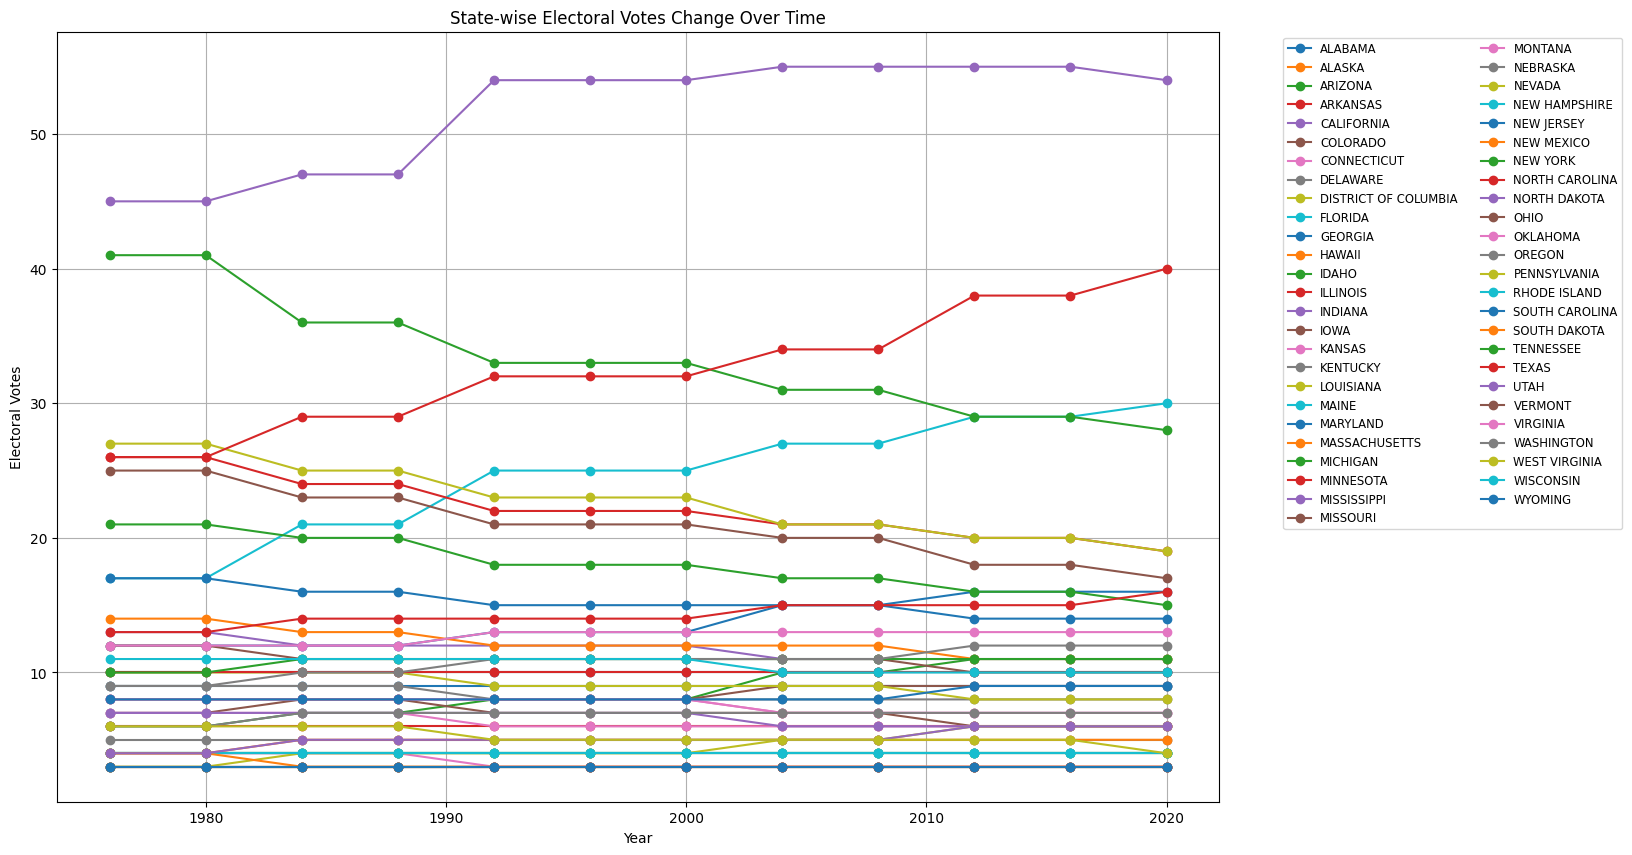

In [ ]:
# Nurodykite failo kelią, kuriame yra rinkimų duomenys su electoral_votes stulpeliu
prezidento_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# Nuskaitome failą
rinkimu_duomenys = pd.read_csv(prezidento_failo_kelias)

# Grupavimas pagal metus ir valstijas, kad nustatytume bendrą kiekvienos valstijos electoral_votes kiekvienais metais
state_electoral_trends = rinkimu_duomenys.groupby(["year", "state"])["electoral_votes"].max().unstack()

# Apskaičiuojame bendrą electoral_votes skaičių kiekvienais metais
total_electoral_votes_per_year = state_electoral_trends.sum(axis=1)

# Braižome kiekvienos valstijos electoral_votes pokytį per metus
plt.figure(figsize=(15, 10))
for state in state_electoral_trends.columns:
    plt.plot(state_electoral_trends.index, state_electoral_trends[state], label=state, linestyle="-", marker="o")

plt.title("State-wise Electoral Votes Change Over Time")
plt.xlabel("Year")
plt.ylabel("Electoral Votes")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small", ncol=2)
plt.grid(True)
plt.show()

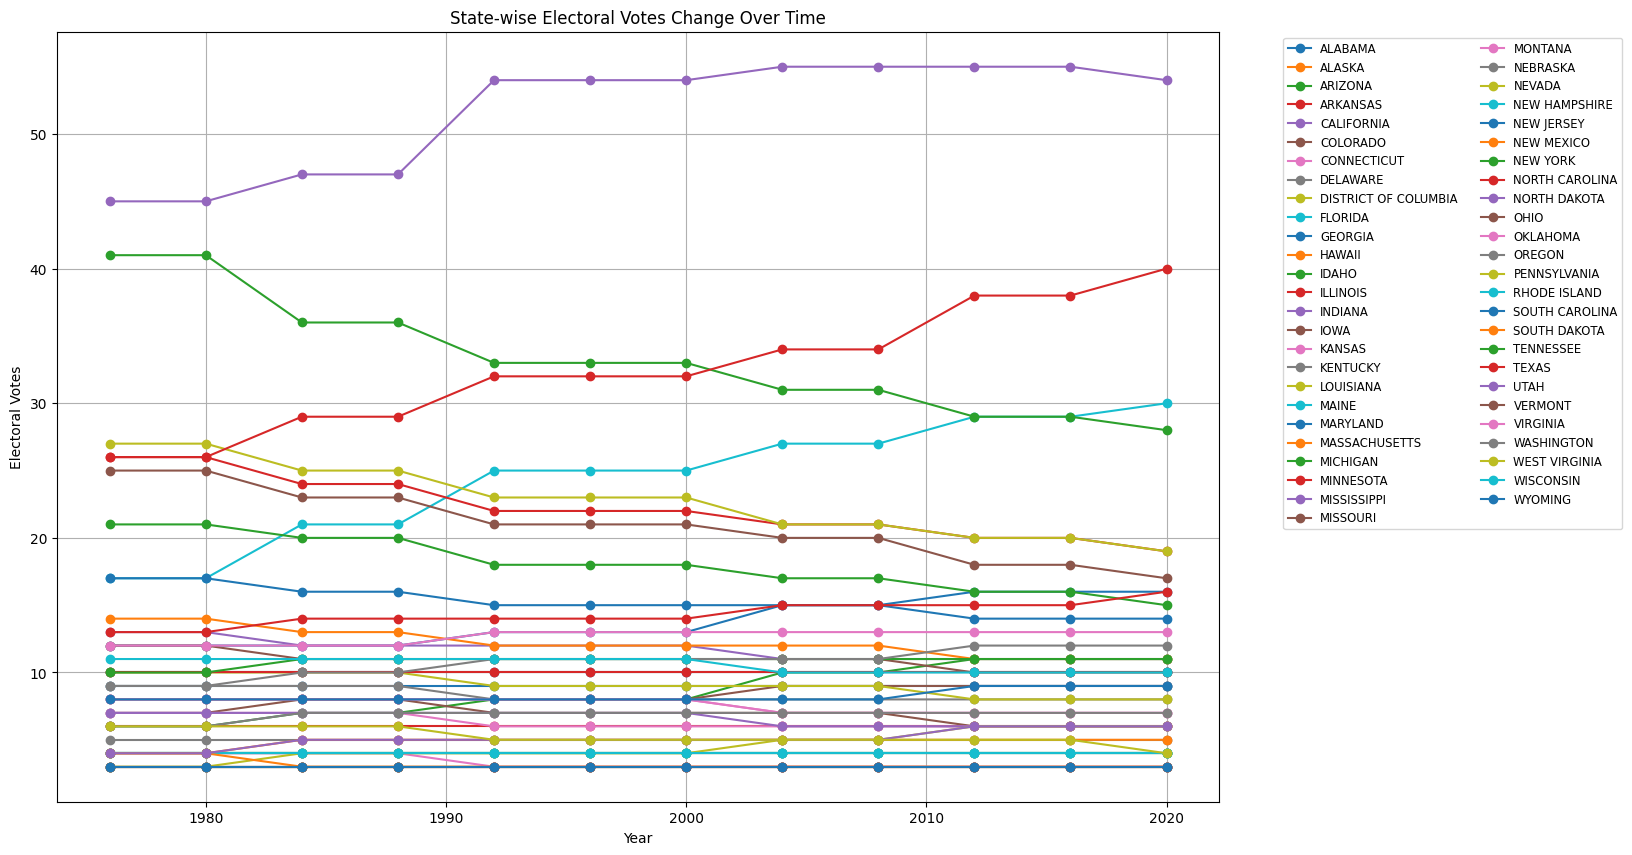

In [ ]:
# Nurodykite failo kelią, kuriame yra rinkimų duomenys su electoral_votes stulpeliu
prezidento_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# Nuskaitome failą
rinkimu_duomenys = pd.read_csv(prezidento_failo_kelias)

# Grupavimas pagal metus ir valstijas, kad nustatytume bendrą kiekvienos valstijos electoral_votes kiekvienais metais
state_electoral_trends = rinkimu_duomenys.groupby(["year", "state"])["electoral_votes"].max().unstack()

# Apskaičiuojame bendrą electoral_votes skaičių kiekvienais metais
total_electoral_votes_per_year = state_electoral_trends.sum(axis=1)

# Braižome kiekvienos valstijos electoral_votes pokytį per metus
plt.figure(figsize=(15, 10))
for state in state_electoral_trends.columns:
    plt.plot(state_electoral_trends.index, state_electoral_trends[state], label=state, linestyle="-", marker="o")

plt.title("State-wise Electoral Votes Change Over Time")
plt.xlabel("Year")
plt.ylabel("Electoral Votes")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small", ncol=2)
plt.grid(True)
plt.show()

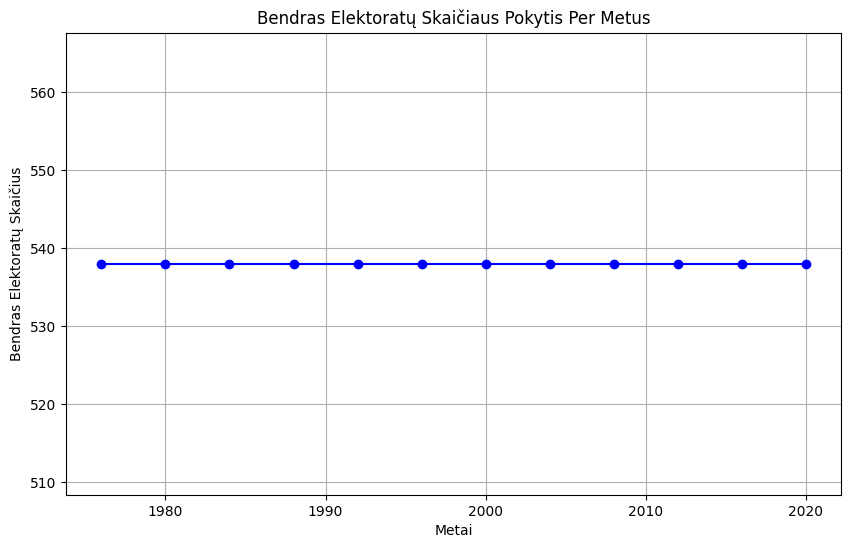

In [ ]:
# Nurodykite kelią į failą su electoral votes informacija
electoral_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\electoral_collage_numbers.csv"

# Nuskaitome failą
electoral_data = pd.read_csv(electoral_failo_kelias)

# Pakeičiame duomenų struktūrą į tinkamą formatą
electoral_data = electoral_data.melt(id_vars=["State"], var_name="year", value_name="electoral_votes")
electoral_data["year"] = electoral_data["year"].astype(int)

# Apskaičiuojame bendrą electoral_votes skaičių kiekvienais metais
bendras_elektoratu_skaicius_per_metus = electoral_data.pivot_table(index="year", values="electoral_votes", aggfunc="sum")

# Braižome bendrą visų valstijų electoral_votes skaičiaus pokytį
plt.figure(figsize=(10, 6))
plt.plot(bendras_elektoratu_skaicius_per_metus.index, bendras_elektoratu_skaicius_per_metus["electoral_votes"], marker="o", linestyle="-", color="b")
plt.title("Bendras Elektoratų Skaičiaus Pokytis Per Metus")
plt.xlabel("Metai")
plt.ylabel("Bendras Elektoratų Skaičius")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-president.csv")  # Pakeistas failo pavadinimas

# 2. Pasirinkite požymius klasterizacijai
# Galimi požymiai: totalvotes, year, candidatevotes, etc.
features = ["totalvotes", "year", "candidatevotes"]

# Paruoškite duomenis
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


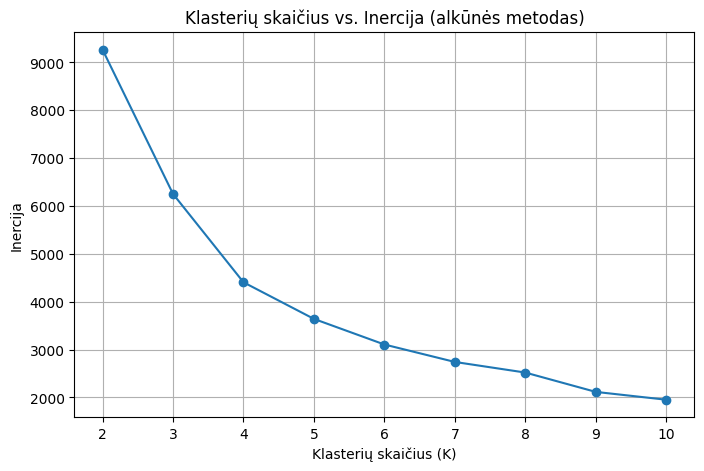

In [ ]:
# Sukurkite „alkūnės metodą“ nustatyti optimalų klasterių skaičių
options = range(2, 11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters=n_clusters, random_state=42)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

# Vizualizuokite rezultatą
plt.figure(figsize=(8, 5))
plt.plot(options, inertias, "-o")
plt.title("Klasterių skaičius vs. Inercija (alkūnės metodas)")
plt.xlabel("Klasterių skaičius (K)")
plt.ylabel("Inercija")
plt.grid(True)
plt.show()


cluster
0    1590
7    1147
2     542
1     314
4     308
5     173
6     171
3      42
Name: count, dtype: int64


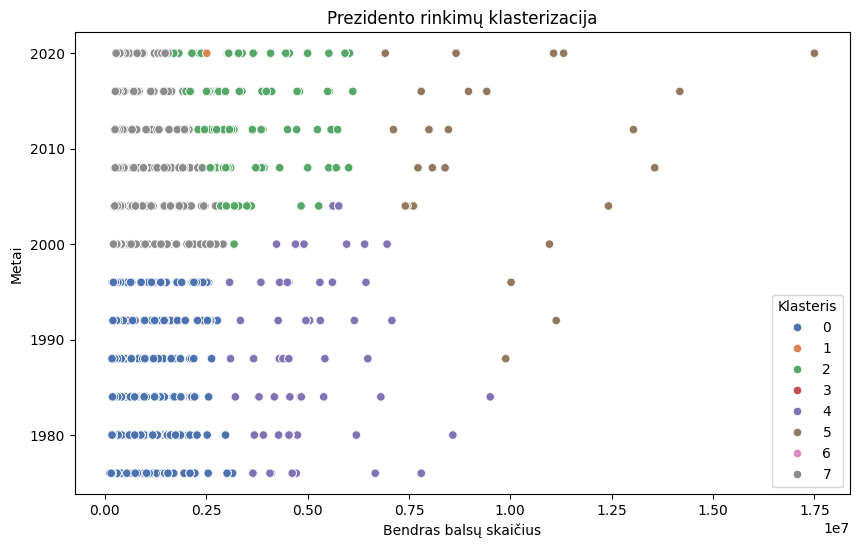

In [ ]:
import seaborn as sns
# klasterių skaičių iš „alkūnės metodo“ 
kmeans = KMeans(n_clusters=8, random_state=42)

# Priskirkite klasterius duomenims
df["cluster"] = kmeans.fit_predict(X_scaled)

# Patikrinkite klasterių paskirstymą
print(df["cluster"].value_counts())

# Vizualizuokite klasterius (pvz., pagal year ir totalvotes)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="totalvotes", y="year", hue="cluster", palette="deep")
plt.title("Prezidento rinkimų klasterizacija")
plt.xlabel("Bendras balsų skaičius")
plt.ylabel("Metai")
plt.legend(title="Klasteris")
plt.show()


In [ ]:
# klasterių skaičių iš „alkūnės metodo“ 
kmeans = KMeans(n_clusters=8, random_state=42)

# Priskirkite klasterius duomenims
df["cluster"] = kmeans.fit_predict(X_scaled)

# Patikrinkite klasterių paskirstymą
print(df["cluster"].value_counts())

# Vizualizuokite klasterius (pvz., pagal year ir totalvotes)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="totalvotes", y="year", hue="cluster", palette="deep")
plt.title("Prezidento rinkimų klasterizacija")
plt.xlabel("Bendras balsų skaičius")
plt.ylabel("Metai")
plt.legend(title="Klasteris")
plt.show()


cluster
0    1246
2    1113
6     507
3     435
4     386
7     329
1     223
5      48
Name: count, dtype: int64


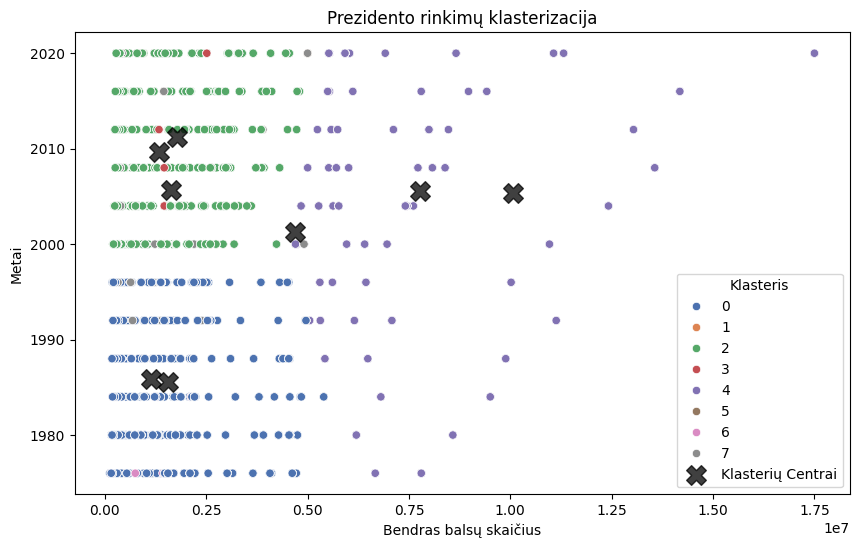

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-president.csv")

# 2. Pasirinkite požymius klasterizacijai
df["rinkejų_aktyvumas"] = df["candidatevotes"] / df.groupby(["year", "state_po"])["candidatevotes"].transform("sum")
features = ["totalvotes", "year", "candidatevotes", "rinkejų_aktyvumas", "partija_numeric"]

# Paruoškite duomenis klasterizacijai
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Klasterizacija su pasirinktu klasterių skaičiumi (pvz., 8)
kmeans = KMeans(n_clusters=8, random_state=42)

# Priskirkite klasterius duomenims
df["cluster"] = kmeans.fit_predict(X_scaled)

# 5. Atvirkštinė transformacija klasterių centrams į originalias reikšmes
centers_original = scaler.inverse_transform(kmeans.cluster_centers_)

# Patikrinkite klasterių paskirstymą
print(df["cluster"].value_counts())

# 6. Vizualizuokite klasterius (pvz., pagal year ir totalvotes)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="totalvotes", y="year", hue="cluster", palette="deep")
plt.title("Prezidento rinkimų klasterizacija")
plt.xlabel("Bendras balsų skaičius")
plt.ylabel("Metai")

# Pridėkite klasterių centrus prie grafiko (suvertus į originalias koordinates)
centers_x, centers_y = centers_original[:, 0], centers_original[:, 1]
plt.scatter(centers_x, centers_y, c="black", s=200, alpha=0.75, marker="X", label="Klasterių Centrai")

plt.legend(title="Klasteris")
plt.show()


cluster
 2    2516
 0     614
 1     612
 3     534
 4       8
-1       3
Name: count, dtype: int64


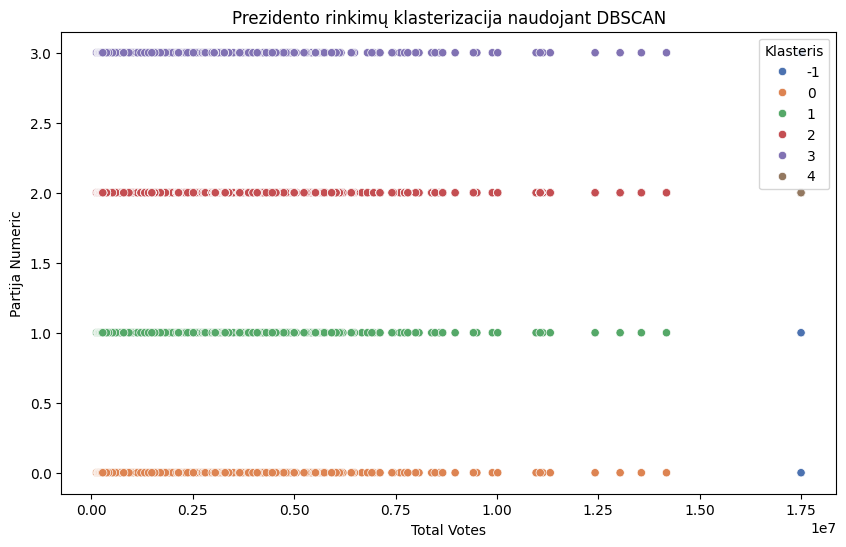

In [ ]:
from sklearn.cluster import DBSCAN
# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-president.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["totalvotes", "partija_numeric"]
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Sukurkite ir treniruokite DBSCAN modelį
dbscan_model = DBSCAN(eps=1.1, min_samples=4)
df["cluster"] = dbscan_model.fit_predict(X_scaled)

# DBSCAN priskiria -1 taškams, kurie yra laikomi "triukšmu" arba išskirtinėmis reikšmėmis
print(df["cluster"].value_counts())

# 5. Vizualizuokite klasterius su Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="totalvotes", y="partija_numeric", hue="cluster", palette="deep", legend="full")
plt.title("Prezidento rinkimų klasterizacija naudojant DBSCAN")
plt.xlabel("Total Votes")
plt.ylabel("Partija Numeric")
plt.legend(title="Klasteris")
plt.show()


cluster
 2    2516
 0     611
 1     611
 3     534
 4       8
-1       7
Name: count, dtype: int64


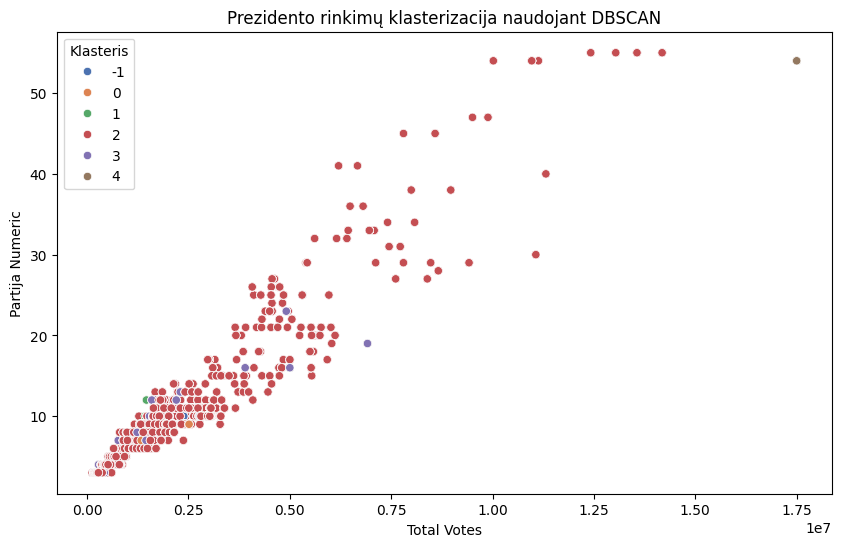

In [ ]:
# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-president.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["totalvotes", "partija_numeric", "electoral_votes","rinkejų_aktyvumas","partija_numeric"]
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Sukurkite ir treniruokite DBSCAN modelį
dbscan_model = DBSCAN(eps=1.1, min_samples=4)
df["cluster"] = dbscan_model.fit_predict(X_scaled)

# DBSCAN priskiria -1 taškams, kurie yra laikomi "triukšmu" arba išskirtinėmis reikšmėmis
print(df["cluster"].value_counts())

# 5. Vizualizuokite klasterius su Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="totalvotes", y="electoral_votes", hue="cluster", palette="deep", legend="full")
plt.title("Prezidento rinkimų klasterizacija naudojant DBSCAN")
plt.xlabel("Total Votes")
plt.ylabel("Partija Numeric")
plt.legend(title="Klasteris")
plt.show()


cluster
 2    2516
 0     611
 1     611
 3     534
 4       8
-1       7
Name: count, dtype: int64


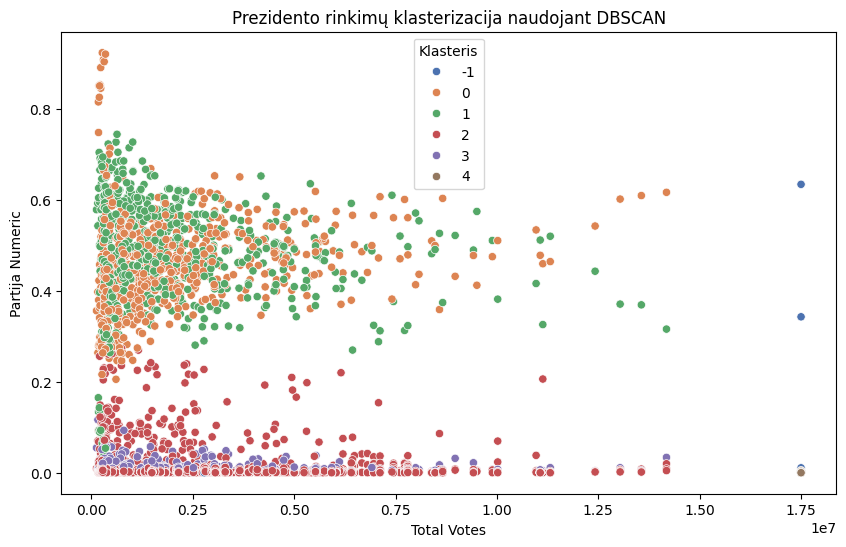

In [ ]:
# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-president.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["totalvotes", "partija_numeric", "electoral_votes","rinkejų_aktyvumas","partija_numeric"]
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Sukurkite ir treniruokite DBSCAN modelį
dbscan_model = DBSCAN(eps=1.1, min_samples=4)
df["cluster"] = dbscan_model.fit_predict(X_scaled)

# DBSCAN priskiria -1 taškams, kurie yra laikomi "triukšmu" arba išskirtinėmis reikšmėmis
print(df["cluster"].value_counts())

# 5. Vizualizuokite klasterius su Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="totalvotes", y="rinkejų_aktyvumas", hue="cluster", palette="deep", legend="full")
plt.title("Prezidento rinkimų klasterizacija naudojant DBSCAN")
plt.xlabel("Total Votes")
plt.ylabel("Partija Numeric")
plt.legend(title="Klasteris")
plt.show()


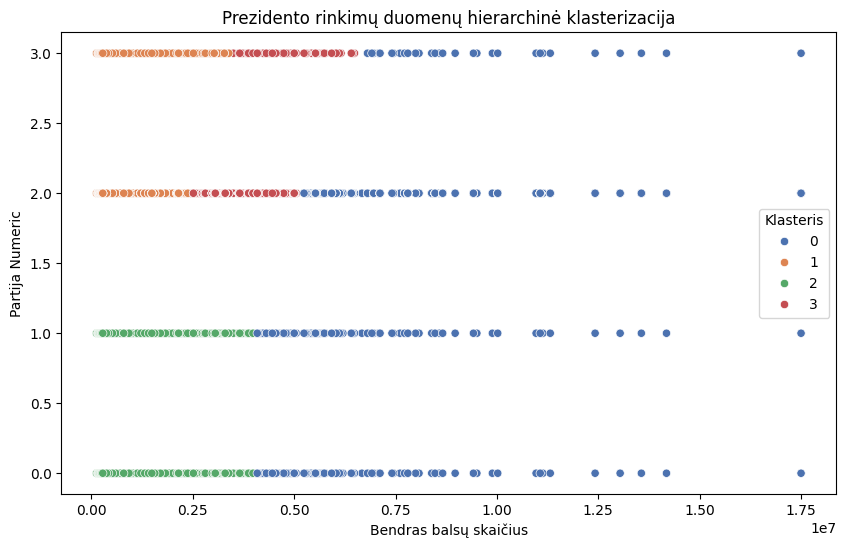

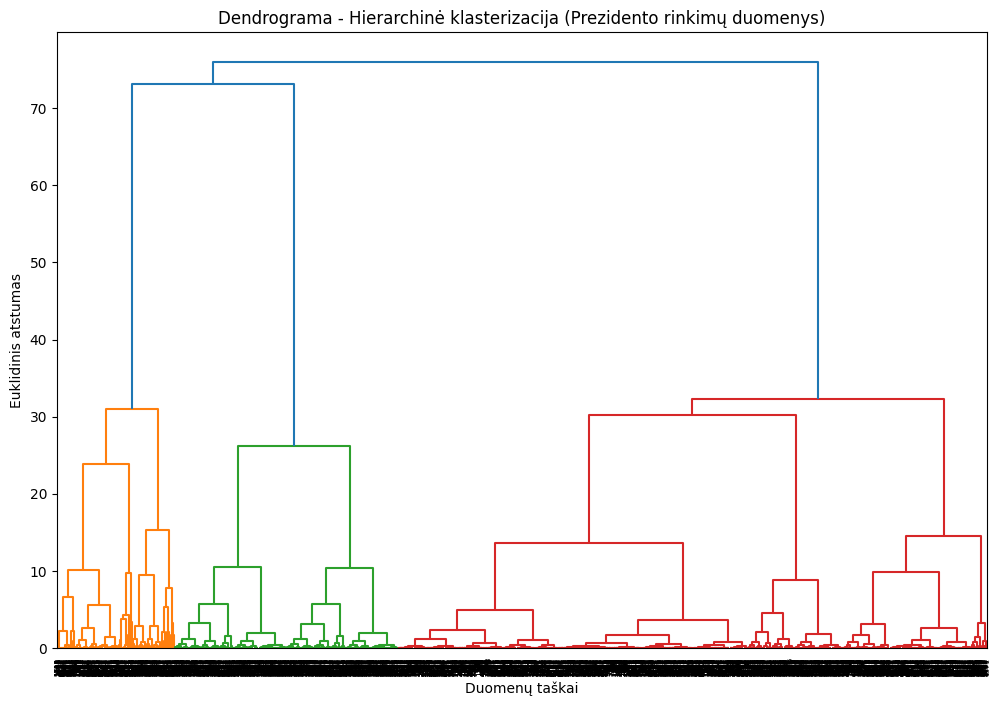

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-president.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["totalvotes", "partija_numeric"]
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Hierarchinė klasterizacija (pvz., su 4 klasteriais)
hierarchical_model = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
df["cluster"] = hierarchical_model.fit_predict(X_scaled)

# 5. Vizualizuokite klasterius su Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="totalvotes", y="partija_numeric", hue="cluster", palette="deep")
plt.title("Prezidento rinkimų duomenų hierarchinė klasterizacija")
plt.xlabel("Bendras balsų skaičius")
plt.ylabel("Partija Numeric")
plt.legend(title="Klasteris")
plt.show()

# 6. Sukurkite dendrogramą, kad pamatytumėte hierarchinę struktūrą
linked = linkage(X_scaled, method="ward")
plt.figure(figsize=(12, 8))
dendrogram(linked,
           orientation="top",
           distance_sort="descending",
           show_leaf_counts=True)
plt.title("Dendrograma - Hierarchinė klasterizacija (Prezidento rinkimų duomenys)")
plt.xlabel("Duomenų taškai")
plt.ylabel("Euklidinis atstumas")
plt.show()


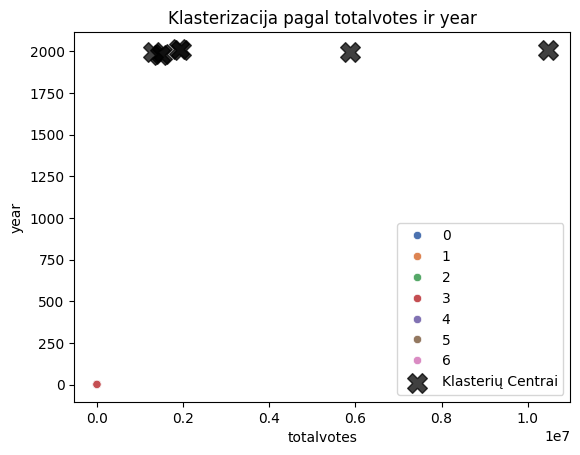

In [ ]:
# 1. Įkelkite prezidento rinkimų duomenis
df = pd.read_csv("1976-2020-president.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["totalvotes", "partija_numeric", "year"]
X = df[features]

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Sukurkite ir treniruokite K-means modelį
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_scaled)

# Atnaujinta funkcija, skirta atvaizduoti klasterius ir centrus
def plot_centroids(model, data, feature_names, x_name, y_name):
    # Sukurti prognozes ir sukurti `DataFrame` su skaitmeninėmis reikšmėmis
    preds = model.fit_predict(data)
    data_df = pd.DataFrame(data, columns=feature_names)
    data_df["cluster"] = preds
    
    # Scatter plot su Seaborn
    sns.scatterplot(data=data_df, x=x_name, y=y_name, hue="cluster", palette="deep")
    
    # Paversti klasterių centrus atgal į originalias koordinates
    centers_original = scaler.inverse_transform(model.cluster_centers_)
    x_index = feature_names.index(x_name)
    y_index = feature_names.index(y_name)
    centers_x, centers_y = centers_original[:, x_index], centers_original[:, y_index]
    
    # Pridėti klasterių centrus
    plt.scatter(centers_x, centers_y, c="black", s=200, alpha=0.75, marker="X", label="Klasterių Centrai")
    plt.title(f"Klasterizacija pagal {x_name} ir {y_name}")
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.legend()
    plt.show()

# Pritaikykite funkciją, pvz., su požymiais "totalvotes" ir "year"
plot_centroids(kmeans, X_scaled, features, "totalvotes", "year")


In [ ]:
def plot_centroids(model, data, x_name, y_name):
    preds = model.fit_predict(data)
    sns.scatterplot(data=X, x=x_name, y=y_name, hue=preds)
    x = data.columns.get_loc(x_name)
    y = data.columns.get_loc(y_name)
    centers_x, centers_y = model.cluster_centers_[:,x], model.cluster_centers_[:,y]
    plt.plot(centers_x, centers_y, "xb")
plot_centroids(model, X, "sepal_length", "petal_length")


NameError: name 'model' is not defined


PCA su 2 komponentais
Paaiškinta dispersija: 0.76
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       179
           1       0.81      0.81      0.81       181
           2       1.00      1.00      1.00       761
           3       1.00      0.99      0.99       166

    accuracy                           0.94      1287
   macro avg       0.90      0.90      0.90      1287
weighted avg       0.94      0.94      0.94      1287


PCA su 3 komponentais
Paaiškinta dispersija: 0.96
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       179
           1       0.83      0.80      0.82       181
           2       0.99      1.00      1.00       761
           3       1.00      0.98      0.99       166

    accuracy                           0.95      1287
   macro avg       0.91      0.91      0.91      1287
weighted avg       0.95      0.95      0.95      1287


PCA su 4 komponentais
Paaiš

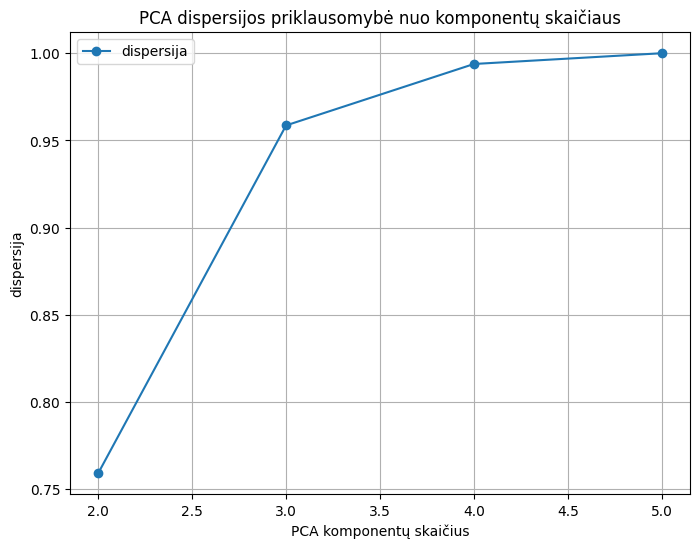

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 1. Įkelkite duomenis
df = pd.read_csv("1976-2020-president.csv")

# 2. Pasirinkite požymius klasterizacijai
features = ["totalvotes", "partija_numeric", "year", "electoral_votes", "rinkejų_aktyvumas"]
X = df[features]
y = df["partija_numeric"]  # Naudokime partijos informaciją kaip tikslinę reikšmę klasifikacijai

# 3. Normalizuokite duomenis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. PCA taikymas ir skirtingų komponentų skaičių bandymas
explained_variances = []
for n_components in [2, 3, 4, 5]:  # Bandykime skirtingą komponentų skaičių
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Išveskite PCA paaiškintą dispersiją
    explained_variances.append(sum(pca.explained_variance_ratio_))
    
    # Sukurkite treniravimo ir testavimo rinkinius
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
    
    # 5. Treniravimo modelis su RandomForestClassifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Testavimas ir rezultatai
    y_pred = clf.predict(X_test)
    print(f"\nPCA su {n_components} komponentais")
    print(f"Paaiškinta dispersija: {sum(pca.explained_variance_ratio_):.2f}")
    print(classification_report(y_test, y_pred))

# 6. Paaiškintos dispersijos vizualizacija
plt.figure(figsize=(8, 6))
components = [2, 3, 4, 5]
plt.plot(components, explained_variances, "-o", label="dispersija")
plt.xlabel("PCA komponentų skaičius")
plt.ylabel("dispersija")
plt.title("PCA dispersijos priklausomybė nuo komponentų skaičiaus")
plt.grid(True)
plt.legend()
plt.show()


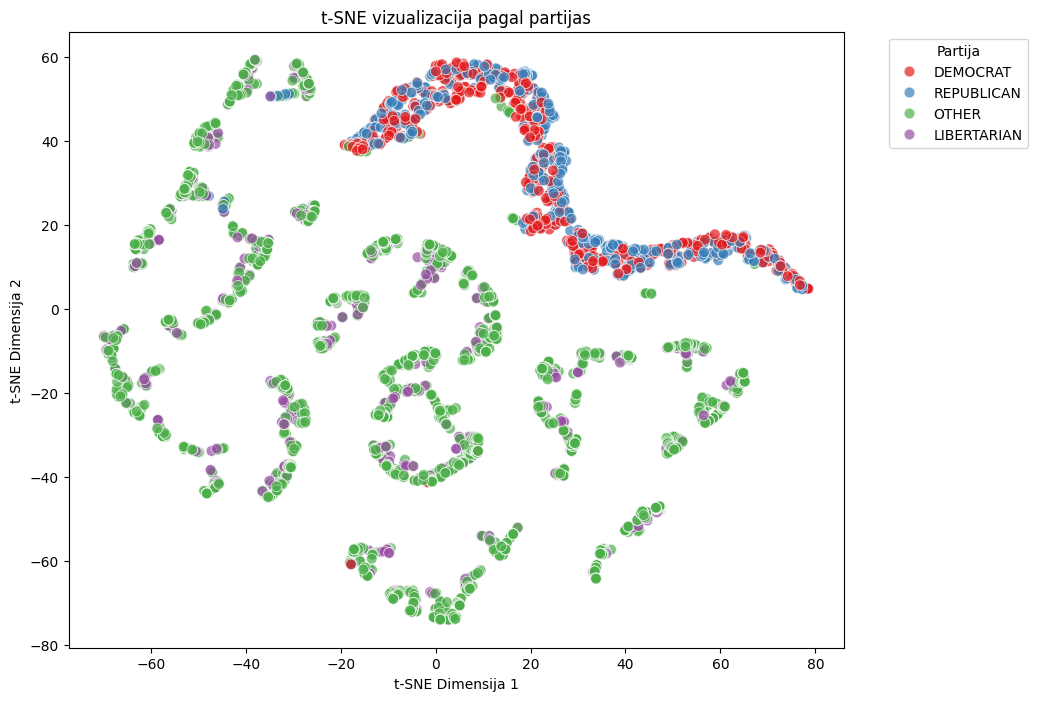

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Nurodykite failo kelią su rinkimų duomenimis
rinkimu_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# Nuskaitome duomenis
rinkimu_duomenys = pd.read_csv(rinkimu_failo_kelias)

rinkimu_duomenys_filtruoti = rinkimu_duomenys[["candidatevotes", "totalvotes"]].dropna()

# Normalizuojame duomenis, kad t-SNE galėtų efektyviau veikti
rinkimu_duomenys_filtruoti = (rinkimu_duomenys_filtruoti - rinkimu_duomenys_filtruoti.mean()) / rinkimu_duomenys_filtruoti.std()

# Pritaikome t-SNE (n_components=2 reiškia, kad sumažinsime duomenis iki dviejų dimensijų)
tsne = TSNE(n_components=2, random_state=42)
tsne_rezultatai = tsne.fit_transform(rinkimu_duomenys_filtruoti)

# Pridedame t-SNE rezultatus į pradinį duomenų rinkinį
rinkimu_duomenys["tsne_dim1"] = tsne_rezultatai[:, 0]
rinkimu_duomenys["tsne_dim2"] = tsne_rezultatai[:, 1]

# Vizualizuojame t-SNE rezultatus
plt.figure(figsize=(10, 8))
sns.scatterplot(x="tsne_dim1", y="tsne_dim2", hue="party_simplified", data=rinkimu_duomenys, palette="Set1", s=60, alpha=0.7)
plt.title("t-SNE vizualizacija pagal partijas")
plt.xlabel("t-SNE Dimensija 1")
plt.ylabel("t-SNE Dimensija 2")
plt.legend(title="Partija", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

# Nurodykite failo kelią su prezidento rinkimų duomenimis
rinkimu_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# Nuskaitome duomenis
rinkimu_duomenys = pd.read_csv(rinkimu_failo_kelias)

# Pasirenkame tik skaitinius stulpelius, pvz., "candidatevotes", "electoral_votes", "totalvotes"
rinkimu_duomenys_filtruoti = rinkimu_duomenys[["candidatevotes", "electoral_votes", "totalvotes"]].dropna()

# Normalizuojame duomenis
rinkimu_duomenys_filtruoti = (rinkimu_duomenys_filtruoti - rinkimu_duomenys_filtruoti.mean()) / rinkimu_duomenys_filtruoti.std()

# Pritaikome t-SNE algoritmą
tsne = TSNE(n_components=2, random_state=42)
tsne_rezultatai = tsne.fit_transform(rinkimu_duomenys_filtruoti)

# Pridedame t-SNE rezultatus į duomenis
rinkimu_duomenys["tsne_dim1"] = tsne_rezultatai[:, 0]
rinkimu_duomenys["tsne_dim2"] = tsne_rezultatai[:, 1]

# Interaktyvi t-SNE vizualizacija su Plotly
fig = px.scatter(rinkimu_duomenys, x="tsne_dim1", y="tsne_dim2", color="party_simplified", 
                 hover_data={"year": True, "state": True, "candidate": True},
                 title="Interaktyvi t-SNE Vizualizacija Prezidento Rinkimų Duomenims")
fig.update_layout(xaxis_title="t-SNE Dimensija 1", yaxis_title="t-SNE Dimensija 2")
fig.show()


In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

# Nurodykite failo kelią su prezidento rinkimų duomenimis
rinkimu_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# Nuskaitome duomenis
rinkimu_duomenys = pd.read_csv(rinkimu_failo_kelias)

rinkimu_duomenys_filtruoti = rinkimu_duomenys[["candidatevotes", "totalvotes"]].dropna()

# Normalizuojame duomenis
rinkimu_duomenys_filtruoti = (rinkimu_duomenys_filtruoti - rinkimu_duomenys_filtruoti.mean()) / rinkimu_duomenys_filtruoti.std()

# Pritaikome t-SNE algoritmą
tsne = TSNE(n_components=2, random_state=42)
tsne_rezultatai = tsne.fit_transform(rinkimu_duomenys_filtruoti)

# Pridedame t-SNE rezultatus į duomenis
rinkimu_duomenys["tsne_dim1"] = tsne_rezultatai[:, 0]
rinkimu_duomenys["tsne_dim2"] = tsne_rezultatai[:, 1]

# Interaktyvi t-SNE vizualizacija su Plotly
fig = px.scatter(rinkimu_duomenys, x="tsne_dim1", y="tsne_dim2", color="party_simplified", 
                 hover_data={"year": True, "state": True, "candidate": True},
                 title="Interaktyvi t-SNE Vizualizacija Prezidento Rinkimų Duomenims")
fig.update_layout(xaxis_title="t-SNE Dimensija 1", yaxis_title="t-SNE Dimensija 2")
fig.show()


In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

# Nurodykite failo kelią su prezidento rinkimų duomenimis
rinkimu_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# Nuskaitome duomenis
rinkimu_duomenys = pd.read_csv(rinkimu_failo_kelias)

rinkimu_duomenys_filtruoti = rinkimu_duomenys[["candidatevotes", "rinkejų_aktyvumas", ]].dropna()

# Normalizuojame duomenis
rinkimu_duomenys_filtruoti = (rinkimu_duomenys_filtruoti - rinkimu_duomenys_filtruoti.mean()) / rinkimu_duomenys_filtruoti.std()

# Pritaikome t-SNE algoritmą
tsne = TSNE(n_components=2, random_state=42)
tsne_rezultatai = tsne.fit_transform(rinkimu_duomenys_filtruoti)

# Pridedame t-SNE rezultatus į duomenis
rinkimu_duomenys["tsne_dim1"] = tsne_rezultatai[:, 0]
rinkimu_duomenys["tsne_dim2"] = tsne_rezultatai[:, 1]

# Interaktyvi t-SNE vizualizacija su Plotly
fig = px.scatter(rinkimu_duomenys, x="tsne_dim1", y="tsne_dim2", color="party_simplified", 
                 hover_data={"year": True, "state": True, "candidate": True},
                 title="Interaktyvi t-SNE Vizualizacija Prezidento Rinkimų Duomenims")
fig.update_layout(xaxis_title="t-SNE Dimensija 1", yaxis_title="t-SNE Dimensija 2")
fig.show()


In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

# Nurodykite failo kelią su prezidento rinkimų duomenimis
rinkimu_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# Nuskaitome duomenis
rinkimu_duomenys = pd.read_csv(rinkimu_failo_kelias)

# Pasirenkame skaitinius stulpelius, pvz., "candidatevotes", "electoral_votes", "totalvotes"
rinkimu_duomenys_filtruoti = rinkimu_duomenys[["candidatevotes", "electoral_votes", "totalvotes"]].dropna()

# Normalizuojame duomenis, kad t-SNE būtų efektyvesnis
rinkimu_duomenys_filtruoti = (rinkimu_duomenys_filtruoti - rinkimu_duomenys_filtruoti.mean()) / rinkimu_duomenys_filtruoti.std()

# Pritaikome t-SNE algoritmą
tsne = TSNE(n_components=2, random_state=42)
tsne_rezultatai = tsne.fit_transform(rinkimu_duomenys_filtruoti)

# Pridedame t-SNE rezultatus į duomenis
rinkimu_duomenys["tsne_dim1"] = tsne_rezultatai[:, 0]
rinkimu_duomenys["tsne_dim2"] = tsne_rezultatai[:, 1]

# Interaktyvi t-SNE vizualizacija su visais pagrindiniais stulpeliais
fig = px.scatter(
    rinkimu_duomenys, x="tsne_dim1", y="tsne_dim2", color="party_simplified",
    hover_data={
        "candidate": True,
        "party_detailed": True,
        "state": True,
        "year": True,
        "candidatevotes": True,
        "totalvotes": True,
        "electoral_votes": True,
        "writein": True,
        "office": True,
        "party_simplified": False  # Šis rodiklis jau atvaizduojamas per "color"
    },
    size="candidatevotes",  # Kandidato balsų skaičius kaip taško dydis
    title="Interaktyvi t-SNE Vizualizacija su Visomis Galimomis Reikšmėmis (Prezidento Rinkimai)"
)

# Pakeičiame ašių pavadinimus
fig.update_layout(
    xaxis_title="t-SNE Dimensija 1",
    yaxis_title="t-SNE Dimensija 2"
)

# Rodymas
fig.show()


In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

# Nurodykite failo kelią su prezidento rinkimų duomenimis
rinkimu_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# Nuskaitome duomenis
rinkimu_duomenys = pd.read_csv(rinkimu_failo_kelias)

# Pasirenkame tik skaitinius stulpelius, kurie yra faile
stulpeliai_analizei = [
    "candidatevotes", "totalvotes", "year", "state_fips", "state_cen", 
    "state_ic", "electoral_votes"
]
rinkimu_duomenys_filtruoti = rinkimu_duomenys[stulpeliai_analizei].dropna()

# Normalizuojame duomenis, kad t-SNE būtų efektyvesnis
rinkimu_duomenys_filtruoti = (rinkimu_duomenys_filtruoti - rinkimu_duomenys_filtruoti.mean()) / rinkimu_duomenys_filtruoti.std()

# Pritaikome t-SNE algoritmą
tsne = TSNE(n_components=2, random_state=42)
tsne_rezultatai = tsne.fit_transform(rinkimu_duomenys_filtruoti)

# Pridedame t-SNE rezultatus į duomenis
rinkimu_duomenys["tsne_dim1"] = tsne_rezultatai[:, 0]
rinkimu_duomenys["tsne_dim2"] = tsne_rezultatai[:, 1]

# Interaktyvi t-SNE vizualizacija su visais pagrindiniais stulpeliais
fig = px.scatter(
    rinkimu_duomenys, x="tsne_dim1", y="tsne_dim2", color="party_simplified",
    hover_data={
        "candidate": True,
        "party_detailed": True,
        "state": True,
        "year": True,
        "candidatevotes": True,
        "totalvotes": True,
        "state_fips": True,
        "state_cen": True,
        "state_ic": True,
        "electoral_votes": True,
        "writein": True,
        "office": True,
        "party_simplified": False
    },
    size="candidatevotes",  # Kandidato balsų skaičius kaip taško dydis
    title="Interaktyvi t-SNE Vizualizacija su Kuo Daugiau Skaitinių Stulpelių (Prezidento Rinkimai)"
)

# Pakeičiame ašių pavadinimus
fig.update_layout(
    xaxis_title="t-SNE Dimensija 1",
    yaxis_title="t-SNE Dimensija 2"
)

# Rodymas
fig.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Nurodykite failo kelią su prezidento rinkimų duomenimis
rinkimu_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# Nuskaitome duomenis
rinkimu_duomenys = pd.read_csv(rinkimu_failo_kelias)

# Pasirenkame savybes (features) ir tikslinę reikšmę
features = ["totalvotes", "electoral_votes", "year", "state_fips", "state_cen", "state_ic"]
target = "candidatevotes"

# Išmetame eilutes su trūkstamomis reikšmėmis
rinkimu_duomenys = rinkimu_duomenys.dropna(subset=features + [target])

# Paruošiame savybes (X) ir tikslinę reikšmę (y)
X = rinkimu_duomenys[features]
y = rinkimu_duomenys[target]

# Padalijame duomenis į mokymo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sukuriame ir treniruojame XGBoost modelį
modelis = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                       learning_rate=0.2, max_depth=10, subsample=0.9, 
                       colsample_bytree=0.7)
modelis.fit(X_train, y_train)

# Atlikime prognozes
y_pred = modelis.predict(X_test)

# Įvertinkime modelio tikslumą
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 444330.28266718227


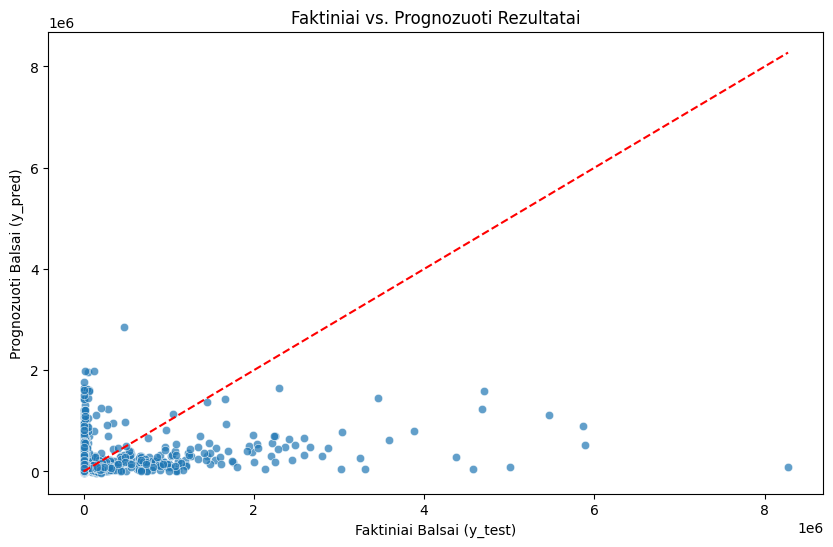

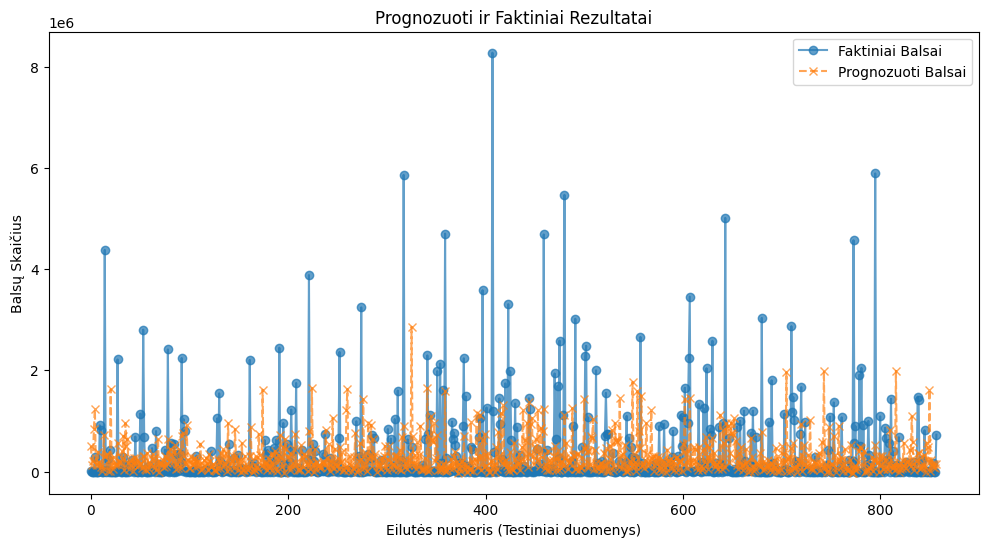

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklaidos diagrama: Faktiniai vs. Prognozuoti rezultatai
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # Linija, rodanti tobulą prognozę
plt.xlabel("Faktiniai Balsai (y_test)")
plt.ylabel("Prognozuoti Balsai (y_pred)")
plt.title("Faktiniai vs. Prognozuoti Rezultatai")
plt.show()

# Linijinė diagrama: Prognozuoti ir Faktiniai Balsai
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Faktiniai Balsai", marker="o", linestyle="-", alpha=0.7)
plt.plot(y_pred, label="Prognozuoti Balsai", marker="x", linestyle="--", alpha=0.7)
plt.xlabel("Eilutės numeris (Testiniai duomenys)")
plt.ylabel("Balsų Skaičius")
plt.title("Prognozuoti ir Faktiniai Rezultatai")
plt.legend()
plt.show()


In [2]:
# pip install graphviz


Note: you may need to restart the kernel to use updated packages.


<Figure size 2000x1000 with 0 Axes>

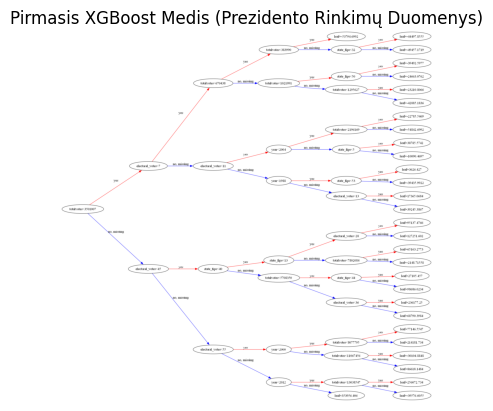

<Figure size 2000x1000 with 0 Axes>

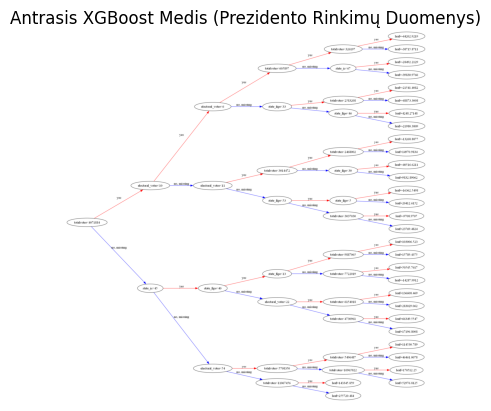

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_tree
import matplotlib.pyplot as plt

# Nurodykite failo kelią su prezidento rinkimų duomenimis
rinkimu_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# Nuskaitome duomenis
rinkimu_duomenys = pd.read_csv(rinkimu_failo_kelias)

# Pasirenkame savybes (features) ir tikslinę reikšmę
features = ["totalvotes", "electoral_votes", "year", "state_fips", "state_cen", "state_ic"]
target = "candidatevotes"

# Išmetame eilutes su trūkstamomis reikšmėmis
rinkimu_duomenys = rinkimu_duomenys.dropna(subset=features + [target])

# Paruošiame savybes (X) ir tikslinę reikšmę (y)
X = rinkimu_duomenys[features]
y = rinkimu_duomenys[target]

# Padalijame duomenis į mokymo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sukuriame ir treniruojame XGBoost modelį
modelis = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=100, 
                       learning_rate=0.2, max_depth=5, subsample=0.9, 
                       colsample_bytree=0.7)
modelis.fit(X_train, y_train)

# Vizualizuojame pirmąjį medį
plt.figure(figsize=(20, 10))
plot_tree(modelis, num_trees=0, rankdir="LR")  # num_trees=0 reiškia pirmasis medis
plt.title("Pirmasis XGBoost Medis (Prezidento Rinkimų Duomenys)")
plt.show()

# Vizualizuojame antrąjį medį (pvz., num_trees=1)
plt.figure(figsize=(20, 10))
plot_tree(modelis, num_trees=1, rankdir="LR")
plt.title("Antrasis XGBoost Medis (Prezidento Rinkimų Duomenys)")
plt.show()


C:\Users\Paulius\AppData\Local\Temp\ipykernel_7464\3958241927.py:14: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  rinkimu_duomenys['winner'] = rinkimu_duomenys.groupby(['year', 'state'])['candidatevotes'].transform(max) == rinkimu_duomenys['candidatevotes']


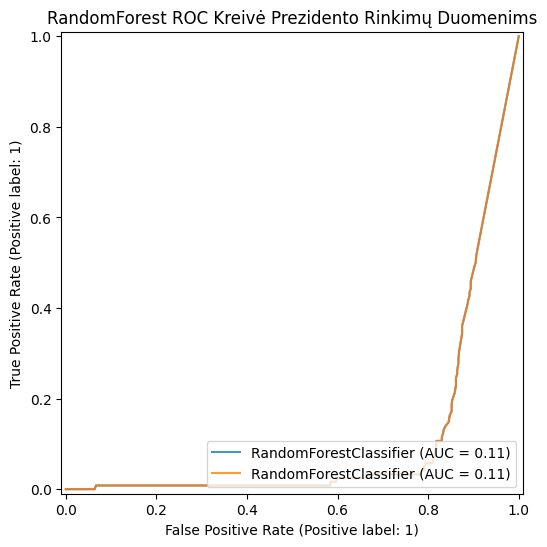

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Nurodykite failo kelią su prezidento rinkimų duomenimis
rinkimu_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# Nuskaitome duomenis
rinkimu_duomenys = pd.read_csv(rinkimu_failo_kelias)

# Sukuriame binarinį tikslinį stulpelį "winner", kuris nurodo, ar kandidatas laimėjo
rinkimu_duomenys["winner"] = rinkimu_duomenys.groupby(["year", "state"])["candidatevotes"].transform(max) == rinkimu_duomenys["candidatevotes"]
rinkimu_duomenys["winner"] = rinkimu_duomenys["winner"].astype(int)  # Konvertuojame į binarinį formatą (1 = laimėtojas, 0 = nelaimėtojas)

# Pasirenkame savybes (features) ir tikslinę reikšmę (target)
features = ["totalvotes", "electoral_votes", "year", "state_fips", "state_cen", "state_ic"]
target = "winner"

# Pašaliname trūkstamas reikšmes
rinkimu_duomenys = rinkimu_duomenys.dropna(subset=features + [target])

# Paruošiame savybes (X) ir tikslinę reikšmę (y)
X = rinkimu_duomenys[features]
y = rinkimu_duomenys[target]

# Padalijame duomenis į mokymo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sukuriame ir treniruojame RandomForest modelį
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Braižome ROC kreivę
fig, ax = plt.subplots(figsize=(8, 6))
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
plt.title("RandomForest ROC Kreivė Prezidento Rinkimų Duomenims")
plt.show()


Modelio tikslumas: 0.86
Ataskaita apie klasifikaciją:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       736
           1       0.00      0.00      0.00       122

    accuracy                           0.86       858
   macro avg       0.43      0.50      0.46       858
weighted avg       0.74      0.86      0.79       858



C:\Users\Paulius\AppData\Local\Temp\ipykernel_18472\3227650616.py:17: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  rinkimu_duomenys['winner'] = rinkimu_duomenys.groupby(['year', 'state'])['candidatevotes'].transform(max) == rinkimu_duomenys['candidatevotes']
c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 

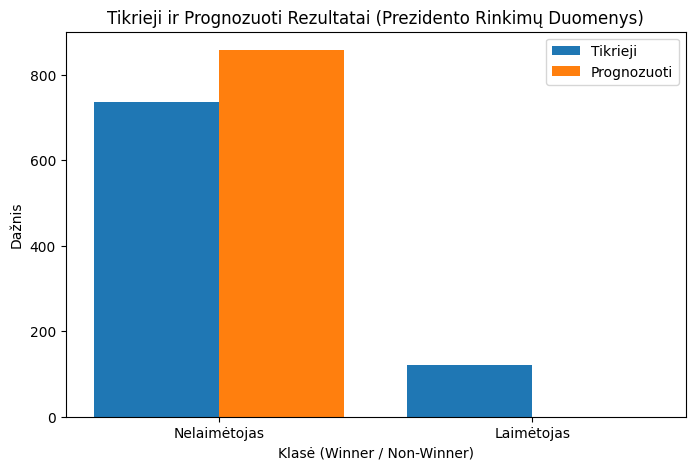

In [ ]:
# Žingsnis 1: Bibliotekų Importavimas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Žingsnis 2: Duomenų Paruošimas
# Nurodykite failo kelią su prezidento rinkimų duomenimis
rinkimu_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"

# Nuskaitome duomenis
rinkimu_duomenys = pd.read_csv(rinkimu_failo_kelias)

# Sukuriame binarinį tikslinį stulpelį "winner", kuris nurodo, ar kandidatas laimėjo
rinkimu_duomenys["winner"] = rinkimu_duomenys.groupby(["year", "state"])["candidatevotes"].transform(max) == rinkimu_duomenys["candidatevotes"]
rinkimu_duomenys["winner"] = rinkimu_duomenys["winner"].astype(int)  # Konvertuojame į binarinį formatą (1 = laimėtojas, 0 = nelaimėtojas)

# Pasirenkame savybes (features) ir tikslinę reikšmę (target)
features = ["totalvotes", "electoral_votes", "year", "state_fips", "state_cen", "state_ic"]
target = "winner"

# Pašaliname trūkstamas reikšmes
rinkimu_duomenys = rinkimu_duomenys.dropna(subset=features + [target])

# Paruošiame savybes (X) ir tikslinę reikšmę (y)
X = rinkimu_duomenys[features]
y = rinkimu_duomenys[target]

# Žingsnis 3: Duomenų Padalijimas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Žingsnis 4: MLP Modelio Sukūrimas ir Treniruotė
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_classifier.fit(X_train, y_train)

# Žingsnis 5: Modelio Vertinimas
# Prognozuojame testavimo duomenis
y_pred = mlp_classifier.predict(X_test)

# Apskaičiuojame tikslumą
accuracy = accuracy_score(y_test, y_pred)
print(f"Modelio tikslumas: {accuracy:.2f}")

# Pateikiame išsamesnę ataskaitą
print("Ataskaita apie klasifikaciją:")
print(classification_report(y_test, y_pred))

# Žingsnis 6: Rezultato Vizualizacija
# Histogramos vizualizacija prognozėms
plt.figure(figsize=(8, 5))
plt.hist([y_test, y_pred], bins=np.arange(3)-0.5, rwidth=0.8, label=["Tikrieji", "Prognozuoti"])
plt.xlabel("Klasė (Winner / Non-Winner)")
plt.ylabel("Dažnis")
plt.title("Tikrieji ir Prognozuoti Rezultatai (Prezidento Rinkimų Duomenys)")
plt.xticks([0, 1], ["Nelaimėtojas", "Laimėtojas"])
plt.legend()
plt.show()


C:\Users\Paulius\AppData\Local\Temp\ipykernel_18472\556471957.py:17: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  rinkimu_duomenys['winner'] = rinkimu_duomenys.groupby(['year', 'state'])['candidatevotes'].transform(max) == rinkimu_duomenys['candidatevotes']


Modelio tikslumas: 0.86
Klasifikacijos ataskaita:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       736
           1       0.00      0.00      0.00       122

    accuracy                           0.86       858
   macro avg       0.43      0.50      0.46       858
weighted avg       0.74      0.86      0.79       858



c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

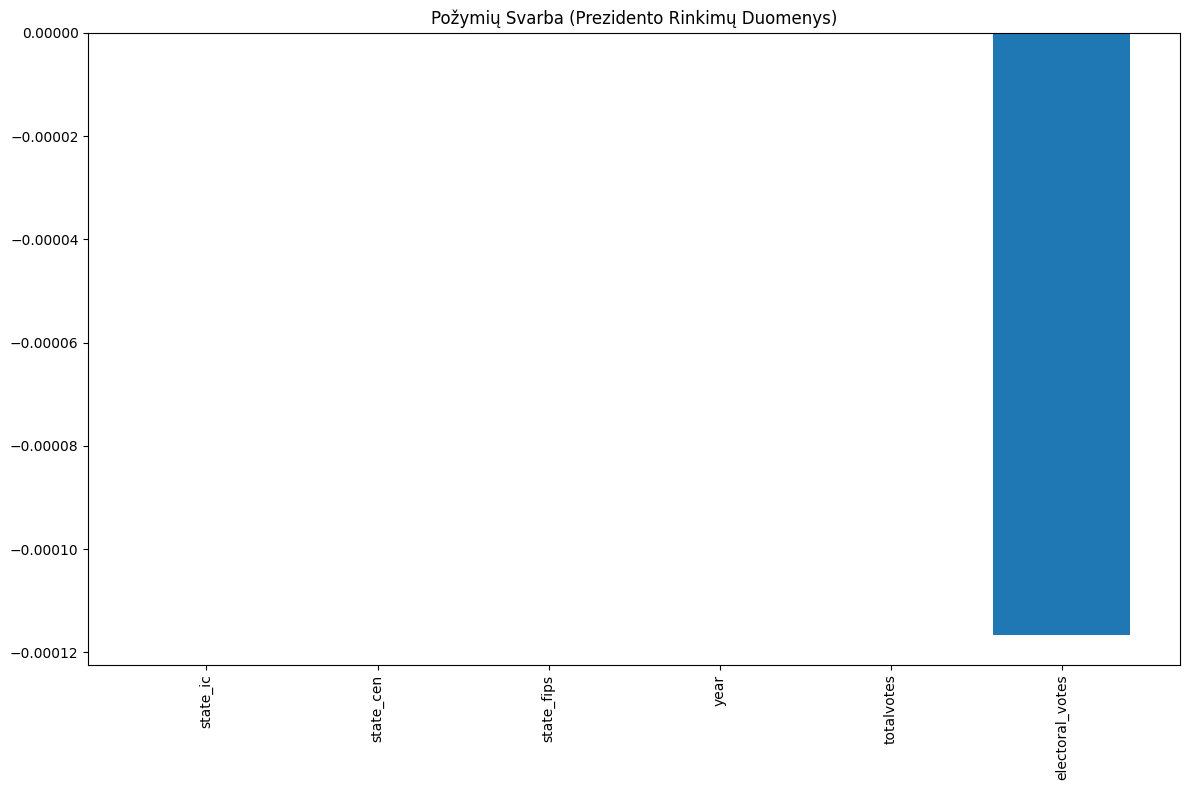

In [ ]:
# Importuojame reikalingas bibliotekas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Nuskaitome prezidento rinkimų duomenis
rinkimu_failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
rinkimu_duomenys = pd.read_csv(rinkimu_failo_kelias)

# Sukuriame binarinį tikslinį stulpelį "winner", kuris nurodo, ar kandidatas laimėjo
rinkimu_duomenys["winner"] = rinkimu_duomenys.groupby(["year", "state"])["candidatevotes"].transform(max) == rinkimu_duomenys["candidatevotes"]
rinkimu_duomenys["winner"] = rinkimu_duomenys["winner"].astype(int)

# Pasirenkame savybes (features) ir tikslinę reikšmę (target)
features = ["totalvotes", "electoral_votes", "year", "state_fips", "state_cen", "state_ic"]
target = "winner"

# Pašaliname trūkstamas reikšmes
rinkimu_duomenys = rinkimu_duomenys.dropna(subset=features + [target])
X = rinkimu_duomenys[features]
y = rinkimu_duomenys[target]

# Padalijame duomenis į mokymo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sukuriame duomenų apdorojimo ir modeliavimo srautą su Pipeline
mlp_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("classifier", MLPClassifier(max_iter=1000, random_state=42))
])

# Treniruojame modelį su mokymo duomenimis
mlp_pipeline.fit(X_train, y_train)

# Prognozuojame ir vertiname modelį
y_pred = mlp_pipeline.predict(X_test)
print(f"Modelio tikslumas: {accuracy_score(y_test, y_pred):.2f}")
print("Klasifikacijos ataskaita:")
print(classification_report(y_test, y_pred))

# Požymių svarbos vertinimas
def features_importance(X_test, y_test, model):
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    importance = result.importances_mean

    # Požymių svarbos vizualizacija
    features = model["poly"].get_feature_names_out(input_features=X.columns)
    indices = np.argsort(importance)[::-1]

    plt.figure(figsize=(12, 8))
    plt.title("Požymių Svarba (Prezidento Rinkimų Duomenys)")
    plt.bar(range(X_test.shape[1]), importance[indices], align="center")
    plt.xticks(range(X_test.shape[1]), features[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Vizualizuojame požymių svarbą
features_importance(X_test, y_test, mlp_pipeline)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone
from sklearn.metrics import accuracy_score, classification_report

# Sukuriame parametrų paieškos erdvę MLP klasifikatoriui
param_grid = {
    "classifier__hidden_layer_sizes": [(50, 50), (100, 50), (100, 100)],
    "classifier__activation": ["tanh", "relu"],
    "classifier__solver": ["sgd", "adam"],
    "classifier__alpha": [0.0001, 0.05],
    "classifier__learning_rate": ["constant", "adaptive"],
}

# Nustatome GridSearchCV su 5 kryžminės patikros kartotėmis
grid_search = GridSearchCV(estimator=clone(mlp_pipeline), param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)

# Paleidžiame paiešką su prezidento rinkimų duomenų mokymo rinkiniu
grid_search.fit(X_train, y_train)

# Geriausi hiperparametrai
print("Geriausi Hiperparametrai:", grid_search.best_params_)
print("Geriausias Tikslumas:", grid_search.best_score_)

# Naudojame geriausią modelį prognozėms ir įvertiname testavimo rinkinyje
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Tikslumas ir klasifikacijos ataskaita testavimo rinkiniui
print(f"Modelio tikslumas su geriausiais hiperparametrais: {accuracy_score(y_test, y_pred):.2f}")
print("Klasifikacijos ataskaita su geriausiais hiperparametrais:")
print(classification_report(y_test, y_pred))


Geriausi Hiperparametrai: {'classifier__activation': 'tanh', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (50, 50), 'classifier__learning_rate': 'constant', 'classifier__solver': 'sgd'}
Geriausias Tikslumas: 0.8571011470281544
Modelio tikslumas su geriausiais hiperparametrais: 0.86
Klasifikacijos ataskaita su geriausiais hiperparametrais:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       736
           1       0.00      0.00      0.00       122

    accuracy                           0.86       858
   macro avg       0.43      0.50      0.46       858
weighted avg       0.74      0.86      0.79       858



c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Paulius\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [ ]:
import pandas as pd

# Load the presidential election data
failo_kelias = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
president_data = pd.read_csv(failo_kelias)

# Get a list of unique candidate names
unique_candidates = president_data["candidate"].drop_duplicates().reset_index(drop=True)
print("List of unique presidential candidates:")
print(unique_candidates)

# Display the list of unique candidates for manual entry of birth years
# At this point, you can use the unique_candidates DataFrame to look up birth years for each candidate


List of unique presidential candidates:
0                CARTER, JIMMY
1                 FORD, GERALD
2               MADDOX, LESTER
3      BUBAR, BENJAMIN ""BEN""
4                    HALL, GUS
                ...           
266           PAIGE, BROOKE H.
267    LAFONTAINE, CHRISTOPHER
268                SWING, GARY
269            MCCORMIC, KEITH
270             SCALF, ZACHARY
Name: candidate, Length: 271, dtype: object


C:\Users\Paulius\AppData\Local\Temp\ipykernel_13680\2882424628.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Year')


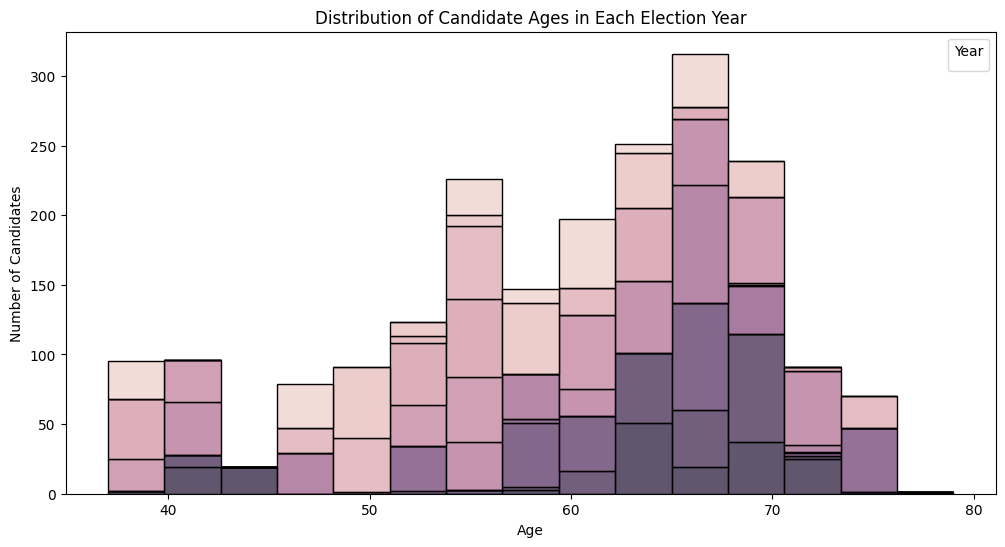

In [ ]:
import seaborn as sns

# Filter out any missing values
age_data = election_data[["year", "age"]].dropna()

plt.figure(figsize=(12, 6))
sns.histplot(data=age_data, x="age", hue="year", multiple="stack", bins=15)
plt.title("Distribution of Candidate Ages in Each Election Year")
plt.xlabel("Age")
plt.ylabel("Number of Candidates")
plt.legend(title="Year")
plt.show()


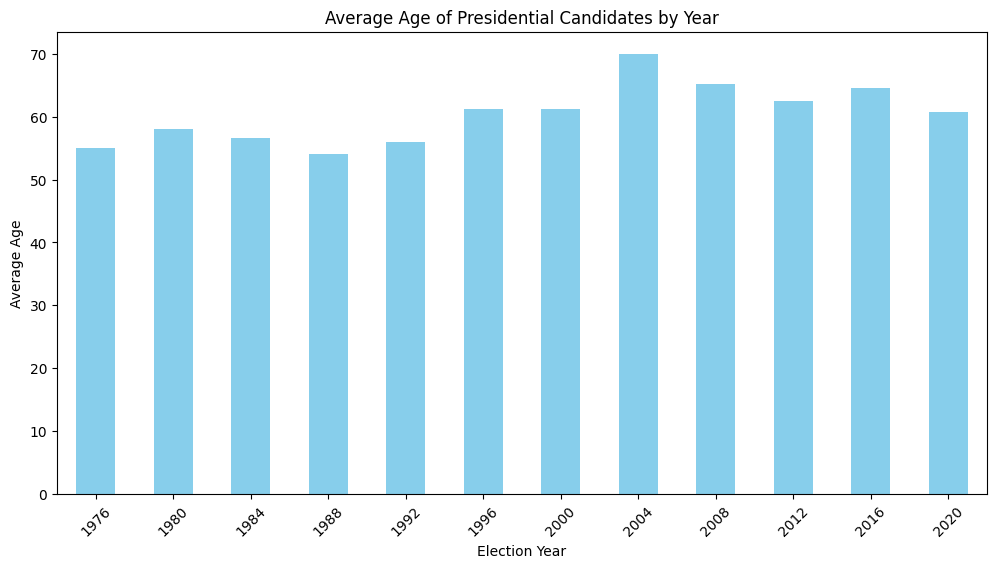

In [ ]:
average_age = election_data.groupby("year")["age"].mean()

plt.figure(figsize=(12, 6))
average_age.plot(kind="bar", color="skyblue")
plt.title("Average Age of Presidential Candidates by Year")
plt.xlabel("Election Year")
plt.ylabel("Average Age")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# import pandas as pd

# # Load the data
# file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
# election_data = pd.read_csv(file_path)

# # Define a function to identify the winner within each year and state
# def mark_winner(group):
#     # Find the candidate with the maximum votes in the group
#     max_votes = group["candidatevotes"].max()
#     # Create a "laimetojas" column that is True for the candidate(s) with the most votes
#     group["laimetojas"] = group["candidatevotes"] == max_votes
#     return group

# # Apply the function to each year-state group
# election_data = election_data.groupby(["year", "state"], group_keys=False).apply(mark_winner)

# # Save the updated data to a new CSV file
# updated_file_path = "C:\\Users\\Paulius\\Duomenu mokslas\\projektas_US_rinkimai\\1976-2020-president.csv"
# election_data.to_csv(updated_file_path, index=False)
# print(f"Updated data with "laimetojas" column saved to {updated_file_path}")


Updated data with 'laimetojas' column saved to C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president.csv


C:\Users\Paulius\AppData\Local\Temp\ipykernel_13680\3730909260.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  election_data = election_data.groupby(['year', 'state'], group_keys=False).apply(mark_winner)


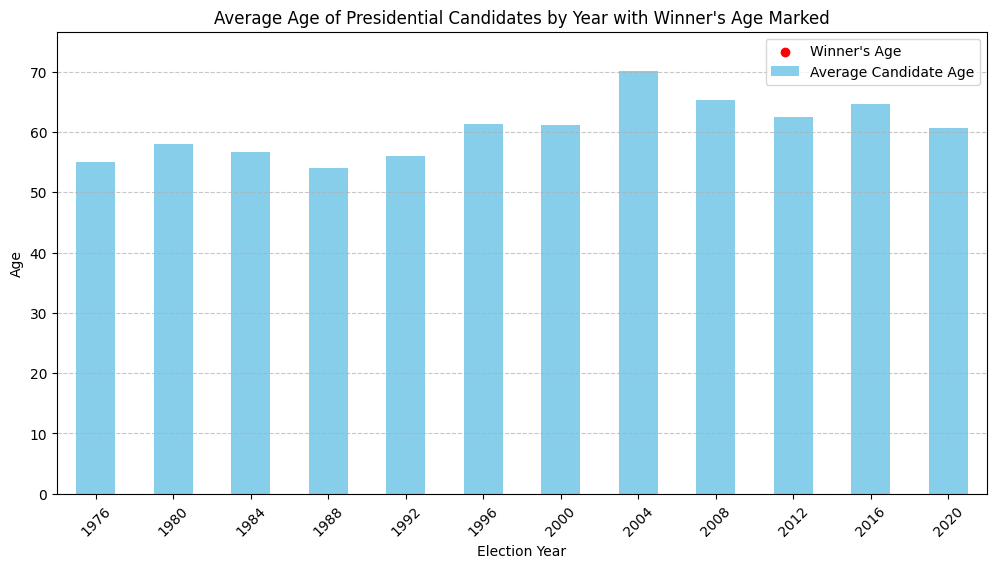

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_path = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-president.csv"

election_data = pd.read_csv(file_path)

# Ensure "laimetojas" column is present and marked correctly
if "laimetojas" not in election_data.columns:
    print("The "laimetojas" column is missing. Please ensure that winners are correctly marked in the data.")
else:
    # Convert "laimetojas" to boolean if necessary
    election_data["laimetojas"] = election_data["laimetojas"].astype(bool)

    # Calculate average age of all candidates by year
    average_age = election_data.groupby("year")["age"].mean()

    # Filter for the winning candidate ages by year
    winners_age = election_data[election_data["laimetojas"]].groupby("year")["age"].first()

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot the average candidate age as bars
    average_age.plot(kind="bar", color="skyblue", label="Average Candidate Age")

    # Overlay the winner"s age as red dots
    plt.scatter(winners_age.index, winners_age, color="red", label="Winner"s Age", zorder=5)
    plt.plot(winners_age.index, winners_age, color="red", linestyle="--", zorder=4)  # Connect winner"s points with a dashed line

    # Add labels, title, and grid
    plt.title("Average Age of Presidential Candidates by Year with Winner"s Age Marked")
    plt.xlabel("Election Year")
    plt.ylabel("Age")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()
